In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
master = pd.read_csv('data/master_503107.csv')
master.head()

patent_number  grant_year  app_year  num_inventors  us_inventor  \
0       D257752        1981      1980              1          1.0   
1       D257924        1981      1980              1          1.0   
2       D258382        1981      1980              2          1.0   
3       D258383        1981      1980              2          1.0   
6       D258678        1981      1980              2          1.0   

   cite_foreign_patent  is_missing  num_design_cited  num_utility_cited  \
0                  0.0           1                 1                  2   
1                  0.0           1                 1                  2   
2                  0.0           1                 2                  1   
3                  0.0           1                 2                  1   
6                  0.0           1                 2                  1   

   non-pat_refs  num_figures  num_assignees  priority_date  missing_data  
0           1.0          6.0              1           1980             0  
1           1.0          6.0              1           1980             0  
2           0.0          5.0              1           1980             0  
3           0.0          5.0              1           1980             0  
6           0.0          5.0              1           1980             0

Need to find out which patents are continuations, and foreign priority

In [3]:
foreign = pd.read_csv('data/foreign_priority.tsv', delimiter ='\t', usecols=['patent_id','date','country_transformed'])
foreign.head()

patent_id        date country_transformed
0   4579440  1982-11-18                  JP
1   4736480  1985-03-27                  DE
2   D449111  2001-01-09                  HK
3   5228311  1990-08-16                  DE
4   9711226  2015-03-04                  JP

In [4]:
related = pd.read_csv('data/usreldoc.tsv', delimiter='\t', usecols=['patent_id','doctype','date','relkind','reldocno','sequence'])
related.head()

patent_id               doctype                relkind     reldocno  \
0   9683848  continuation-in-part        parent document     13336060   
1   8343191   related-publication                    NaN  20080215100   
2   9435959   related-publication                    NaN  20140147079   
3   8394761              division  parent grant document      7662772   
4   7626702   related-publication                    NaN  20080144031   

         date  sequence  
0  2011-12-23        36  
1  2008-09-04         1  
2  2014-05-29         1  
3  0000-00-00         4  
4  2008-06-19         2

creating column for family size

In [5]:
master['family_size'] = 1
master.head()

patent_number  grant_year  app_year  num_inventors  us_inventor  \
0       D257752        1981      1980              1          1.0   
1       D257924        1981      1980              1          1.0   
2       D258382        1981      1980              2          1.0   
3       D258383        1981      1980              2          1.0   
6       D258678        1981      1980              2          1.0   

   cite_foreign_patent  is_missing  num_design_cited  num_utility_cited  \
0                  0.0           1                 1                  2   
1                  0.0           1                 1                  2   
2                  0.0           1                 2                  1   
3                  0.0           1                 2                  1   
6                  0.0           1                 2                  1   

   non-pat_refs  num_figures  num_assignees  priority_date  missing_data  \
0           1.0          6.0              1           1980             0   
1           1.0          6.0              1           1980             0   
2           0.0          5.0              1           1980             0   
3           0.0          5.0              1           1980             0   
6           0.0          5.0              1           1980             0   

   family_size  
0            1  
1            1  
2            1  
3            1  
6            1

select master that have related patent

In [6]:
# rel = master.loc[master.patent_number.isin(related.patent_id.tolist())]
rel = related.loc[related.patent_id.isin(master.patent_number.tolist())]
rel.patent_id.nunique()

35066

In [7]:
rel.head()

patent_id               doctype                relkind  reldocno  \
181   D626200              division  parent grant document   D616533   
320   D635252  continuation-in-part  parent grant document   D626219   
361   D657885              division         child document  29384608   
381   D692163              division  parent grant document   D677799   
493   D646577              division        parent document  29366484   

           date  sequence  
181  0000-00-00         1  
320  0000-00-00         3  
361  0000-00-00         2  
381  0000-00-00         1  
493  2010-07-26         0

In [7]:
rel.doctype.unique()

array(['division', 'continuation-in-part', 'continuation',
       'continuation_in_part', 'substitution',
       'us-provisional-application', 'us_provisional_application',
       'related_publication', 'reissue'], dtype=object)

In [8]:
rel.relkind.unique()

array(['parent grant document', 'child document', 'parent document',
       'parent_grant_document', 'child_doc', 'parent_doc',
       'parent pct document', nan, 'parent_pct_document'], dtype=object)

In [21]:
rel.dropna(subset=['relkind'], inplace=True)

/home/tiera/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
test = rel.loc[(rel.relkind.str.match('parent grant document')) | (rel.relkind.str.match('parent_grant_document'))]

In [114]:
grouped_df = test.groupby('patent_id')

for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")

        patent_id       doctype                relkind reldocno        date  \
4311696   D452639  continuation  parent_grant_document  D406740  0000-00-00   
7370721   D452639  continuation  parent_grant_document  D406740  0000-00-00   

         sequence  
4311696         4  
7370721         5   


        patent_id   doctype                relkind reldocno        date  \
2407327   D452642  division  parent_grant_document  D439143  0000-00-00   
3999115   D452642  division  parent_grant_document  D439143  0000-00-00   

         sequence  
2407327         4  
3999115         5   


        patent_id   doctype                relkind reldocno        date  \
180522    D452651  division  parent_grant_document  D438102  0000-00-00   
678344    D452651  division  parent_grant_document  D442858  0000-00-00   
717967    D452651  division  parent_grant_document  D436858  0000-00-00   
1081733   D452651  division  parent_grant_document  D436858  0000-00-00   
2288470   D452651  division  parent

        patent_id               doctype                relkind reldocno  \
7581187   D455331  continuation_in_part  parent_grant_document  6137866   

               date  sequence  
7581187  0000-00-00         2   


        patent_id   doctype                relkind reldocno        date  \
2539724   D455344  division  parent_grant_document  D444379  0000-00-00   

         sequence  
2539724         2   


        patent_id   doctype                relkind reldocno        date  \
7039311   D455345  division  parent_grant_document  D444379  0000-00-00   

         sequence  
7039311         2   


        patent_id   doctype                relkind reldocno        date  \
2507231   D455346  division  parent_grant_document  D433325  0000-00-00   
4294285   D455346  division  parent_grant_document  D439836  0000-00-00   
6990107   D455346  division  parent_grant_document  D434317  0000-00-00   
7850832   D455346  division  parent_grant_document  D447409  0000-00-00   

         sequence 

1754090  0000-00-00         2   


        patent_id               doctype                relkind reldocno  \
5482319   D457645  continuation_in_part  parent_grant_document  D429338   

               date  sequence  
5482319  0000-00-00         2   


        patent_id   doctype                relkind reldocno        date  \
5870767   D457652  division  parent_grant_document  D442700  0000-00-00   

         sequence  
5870767         2   


        patent_id               doctype                relkind reldocno  \
1000289   D457665  continuation_in_part  parent_grant_document  D441882   

               date  sequence  
1000289  0000-00-00         2   


        patent_id   doctype                relkind reldocno        date  \
7552403   D457679  division  parent_grant_document  D443945  0000-00-00   

         sequence  
7552403         2   


        patent_id   doctype                relkind reldocno        date  \
5362419   D457715  division  parent_grant_document  D441417  0000-

516061         2   


        patent_id               doctype                relkind reldocno  \
4977013   D460616  continuation_in_part  parent_grant_document  D437481   

               date  sequence  
4977013  0000-00-00         2   


        patent_id   doctype                relkind reldocno        date  \
4549069   D460619  division  parent_grant_document  D446017  0000-00-00   

         sequence  
4549069         2   


       patent_id               doctype                relkind reldocno  \
278657   D460621  continuation_in_part  parent_grant_document  D446011   

              date  sequence  
278657  0000-00-00         2   


        patent_id   doctype                relkind reldocno        date  \
186153    D460752  division  parent_grant_document  D444142  0000-00-00   
6215767   D460752  division  parent_grant_document  D424568  0000-00-00   

         sequence  
186153          4  
6215767         6   


        patent_id   doctype                relkind reldocno    

6764341  0000-00-00         7   


        patent_id               doctype                relkind reldocno  \
6955419   D463546  continuation_in_part  parent_grant_document  D446578   

               date  sequence  
6955419  0000-00-00         2   


        patent_id   doctype                relkind reldocno        date  \
1331425   D463560  division  parent_grant_document  D439340  0000-00-00   
2472447   D463560  division  parent_grant_document  D454953  0000-00-00   
4078836   D463560  division  parent_grant_document  D450122  0000-00-00   
7656851   D463560  division  parent_grant_document  D457242  0000-00-00   

         sequence  
1331425        11  
2472447         7  
4078836         9  
7656851         5   


        patent_id   doctype                relkind reldocno        date  \
5406887   D463583  division  parent_grant_document  D451611  0000-00-00   

         sequence  
5406887         2   


       patent_id   doctype                relkind reldocno        date  \


2735777         2   


       patent_id       doctype                relkind reldocno        date  \
221070   D465953  continuation  parent_grant_document  D454741  0000-00-00   

        sequence  
221070         2   


        patent_id   doctype                relkind reldocno        date  \
4400202   D465979  division  parent_grant_document  D447675  0000-00-00   

         sequence  
4400202         2   


        patent_id   doctype                relkind reldocno        date  \
4208769   D466020  division  parent_grant_document  D459231  0000-00-00   

         sequence  
4208769         3   


        patent_id               doctype                relkind reldocno  \
635281    D466047          continuation  parent_grant_document  D449012   
1049797   D466047  continuation_in_part  parent_grant_document  D431795   

               date  sequence  
635281   0000-00-00         3  
1049797  0000-00-00         5   


        patent_id   doctype                relkind reldocno       

        patent_id               doctype                relkind reldocno  \
7285830   D468840  continuation_in_part  parent_grant_document  D445920   

               date  sequence  
7285830  0000-00-00         2   


        patent_id   doctype                relkind reldocno        date  \
2005575   D468875  division  parent_grant_document  D457278  0000-00-00   

         sequence  
2005575         2   


        patent_id   doctype                relkind reldocno        date  \
4651964   D468876  division  parent_grant_document  D457278  0000-00-00   

         sequence  
4651964         2   


        patent_id   doctype                relkind reldocno        date  \
6830906   D468896  division  parent_grant_document  D457297  0000-00-00   

         sequence  
6830906         2   


        patent_id               doctype                relkind reldocno  \
3559175   D468906  continuation_in_part  parent_grant_document  D417074   

               date  sequence  
3559175  0000-00-

2739863         2   


        patent_id       doctype                relkind reldocno        date  \
6459443   D471883  continuation  parent_grant_document  D460426  0000-00-00   

         sequence  
6459443         2   


        patent_id   doctype                relkind reldocno        date  \
5403063   D471916  division  parent_grant_document  D457890  0000-00-00   

         sequence  
5403063         2   


       patent_id   doctype                relkind reldocno        date  \
583705   D471970  division  parent_grant_document  D409740  0000-00-00   

        sequence  
583705         2   


        patent_id               doctype                relkind reldocno  \
4918817   D472048  continuation_in_part  parent_grant_document  D417074   

               date  sequence  
4918817  0000-00-00         4   


        patent_id               doctype                relkind reldocno  \
3053099   D472057  continuation_in_part  parent_grant_document  D458033   

               date  s

6981164         2   


        patent_id               doctype                relkind reldocno  \
1594821   D474098  continuation_in_part  parent_grant_document  D445015   
2734189   D474098  continuation_in_part  parent_grant_document  D447042   

               date  sequence  
1594821  0000-00-00         7  
2734189  0000-00-00         5   


        patent_id       doctype                relkind reldocno        date  \
4166618   D474099  continuation  parent_grant_document  D458529  0000-00-00   
7915530   D474099  continuation  parent_grant_document  6460385  0000-00-00   

         sequence  
4166618         8  
7915530        11   


     patent_id               doctype                relkind reldocno  \
6484   D474127  continuation_in_part  parent_grant_document  D464287   

            date  sequence  
6484  0000-00-00         2   


        patent_id   doctype                relkind reldocno        date  \
5169678   D474190  division  parent_grant_document  D458269  0000-00-0

3965069         2   


        patent_id               doctype                relkind reldocno  \
6554640   D477145  continuation_in_part  parent_grant_document  D466301   

               date  sequence  
6554640  0000-00-00         2   


        patent_id       doctype                relkind reldocno        date  \
432816    D477146  continuation  parent_grant_document  5992673  0000-00-00   
3996834   D477146  continuation  parent_grant_document  D463667  0000-00-00   
6459326   D477146  continuation  parent_grant_document  D444950  0000-00-00   

         sequence  
432816          8  
3996834         4  
6459326         6   


        patent_id   doctype                relkind reldocno        date  \
2404559   D477231  division  parent_grant_document  D472817  0000-00-00   

         sequence  
2404559         2   


       patent_id   doctype                relkind reldocno        date  \
811068   D477240  division  parent_grant_document  D468223  0000-00-00   

        sequence

7363002  0000-00-00         2   


        patent_id   doctype                relkind reldocno        date  \
3646079   D479906  division  parent_grant_document  D473040  0000-00-00   

         sequence  
3646079         2   


        patent_id   doctype                relkind reldocno        date  \
7195176   D479909  division  parent_grant_document  D468096  0000-00-00   

         sequence  
7195176         2   


        patent_id   doctype                relkind reldocno        date  \
2460225   D479928  division  parent_grant_document  D473737  0000-00-00   

         sequence  
2460225         2   


        patent_id   doctype                relkind reldocno        date  \
5273668   D479959  division  parent_grant_document  6490796  0000-00-00   

         sequence  
5273668         2   


        patent_id               doctype                relkind reldocno  \
7242455   D479973  continuation_in_part  parent_grant_document  D440860   

               date  sequence  
724245

4409364         4   


       patent_id       doctype                relkind reldocno        date  \
878429   D482856  continuation  parent_grant_document  D472696  0000-00-00   

        sequence  
878429         4   


        patent_id       doctype                relkind reldocno        date  \
2336649   D482857  continuation  parent_grant_document  D472696  0000-00-00   

         sequence  
2336649         4   


        patent_id   doctype                relkind reldocno        date  \
5267837   D482877  division  parent_grant_document  D471726  0000-00-00   

         sequence  
5267837         2   


        patent_id               doctype                relkind reldocno  \
5907754   D482910  continuation_in_part  parent_grant_document  D455291   

               date  sequence  
5907754  0000-00-00         2   


        patent_id   doctype                relkind reldocno        date  \
7031208   D482931  division  parent_grant_document  D468160  0000-00-00   

         seque

6600125         4   


        patent_id       doctype                relkind reldocno        date  \
5499161   D485849  continuation  parent_grant_document  D474784  0000-00-00   

         sequence  
5499161         4   


        patent_id   doctype                relkind reldocno        date  \
7025295   D485858  division  parent_grant_document  D471584  0000-00-00   

         sequence  
7025295         2   


        patent_id   doctype                relkind reldocno        date  \
2617007   D485993  division  parent_grant_document  D471020  0000-00-00   

         sequence  
2617007         2   


        patent_id   doctype                relkind reldocno        date  \
6958399   D485995  division  parent_grant_document  D472719  0000-00-00   

         sequence  
6958399         2   


        patent_id   doctype                relkind reldocno        date  \
1254147   D486004  division  parent_grant_document  D473391  0000-00-00   

         sequence  
1254147         2   



4961785         2   


        patent_id       doctype                relkind reldocno        date  \
2699160   D488959  continuation  parent_grant_document  6601745  0000-00-00   

         sequence  
2699160         2   


        patent_id   doctype                relkind reldocno        date  \
6644845   D488998  division  parent_grant_document  D471791  0000-00-00   

         sequence  
6644845         2   


        patent_id               doctype                relkind reldocno  \
5774523   D489005          continuation  parent_grant_document  6446823   
7959268   D489005  continuation_in_part  parent_grant_document  6523709   

               date  sequence  
5774523  0000-00-00         3  
7959268  0000-00-00         5   


        patent_id               doctype                relkind reldocno  \
49503     D489069  continuation_in_part  parent_grant_document  D447482   
4766109   D489069              division  parent_grant_document  D465784   

               date  sequence 

7417420         2   


        patent_id   doctype                relkind reldocno        date  \
5271622   D491190  division  parent_grant_document  D484143  0000-00-00   

         sequence  
5271622         2   


        patent_id   doctype                relkind reldocno        date  \
872885    D491209  division  parent_grant_document  D472211  0000-00-00   
1039893   D491209  division  parent_grant_document  D485236  0000-00-00   
2017679   D491209  division  parent_grant_document  D461164  0000-00-00   
7121038   D491209  division  parent_grant_document  D475967  0000-00-00   

         sequence  
872885          9  
1039893         5  
2017679        11  
7121038         7   


        patent_id               doctype                relkind reldocno  \
2328785   D491211  continuation_in_part  parent_grant_document  6597523   

               date  sequence  
2328785  0000-00-00         2   


       patent_id       doctype                relkind reldocno        date  \
249904  

6292074  0000-00-00         4   


        patent_id   doctype                relkind reldocno        date  \
5522879   D493352  division  parent_grant_document  D479459  0000-00-00   

         sequence  
5522879         2   


       patent_id   doctype                relkind reldocno        date  \
657810   D493388  division  parent_grant_document  D486094  0000-00-00   

        sequence  
657810         2   


       patent_id       doctype                relkind reldocno        date  \
116328   D493421  continuation  parent_grant_document  D483326  0000-00-00   

        sequence  
116328         2   


        patent_id   doctype                relkind reldocno        date  \
2506933   D493444  division  parent_grant_document  D479714  0000-00-00   

         sequence  
2506933         2   


        patent_id   doctype                relkind reldocno        date  \
1664175   D493465  division  parent_grant_document  D476009  0000-00-00   
3971950   D493465  division  parent_gra

4862262         2   


        patent_id   doctype                relkind reldocno        date  \
4017080   D496539  division  parent_grant_document  D473401  0000-00-00   

         sequence  
4017080         2   


        patent_id   doctype                relkind reldocno        date  \
3065943   D496544  division  parent_grant_document  D480232  0000-00-00   

         sequence  
3065943         2   


        patent_id   doctype                relkind reldocno        date  \
5175329   D496554  division  parent_grant_document  D482230  0000-00-00   

         sequence  
5175329         2   


        patent_id   doctype                relkind reldocno        date  \
2417307   D496583  division  parent_grant_document  D480630  0000-00-00   

         sequence  
2417307         2   


        patent_id               doctype                relkind reldocno  \
4431884   D496595  continuation_in_part  parent_grant_document  D479544   
5422964   D496595  continuation_in_part  parent_gra

228788         2   


        patent_id               doctype                relkind reldocno  \
4073564   D498764          continuation  parent_grant_document  D474784   
6208313   D498764  continuation_in_part  parent_grant_document  D484144   

               date  sequence  
4073564  0000-00-00         3  
6208313  0000-00-00         5   


        patent_id       doctype                relkind reldocno        date  \
141678    D498773  continuation  parent_grant_document  D447497  0000-00-00   
480331    D498773  continuation  parent_grant_document  D440239  0000-00-00   
2105992   D498773  continuation  parent_grant_document  D461456  0000-00-00   
5663831   D498773  continuation  parent_grant_document  D422290  0000-00-00   
6354905   D498773  continuation  parent_grant_document  D427214  0000-00-00   
7332459   D498773  continuation  parent_grant_document  D479538  0000-00-00   

         sequence  
141678         11  
480331         13  
2105992         9  
5663831        17  

7561287         1   


       patent_id   doctype                relkind reldocno        date  \
436780   D500623  division  parent grant document  D491405  0000-00-00   

        sequence  
436780         1   


        patent_id   doctype                relkind reldocno        date  \
4127694   D500642  division  parent grant document  D493082  0000-00-00   

         sequence  
4127694         1   


        patent_id   doctype                relkind reldocno        date  \
1510703   D500676  division  parent grant document  D483665  0000-00-00   

         sequence  
1510703         1   


        patent_id               doctype                relkind reldocno  \
406974    D500677  continuation-in-part  parent grant document  D465730   
3046022   D500677  continuation-in-part  parent grant document  D480644   
6561235   D500677              division  parent grant document  D463281   

               date  sequence  
406974   0000-00-00         4  
3046022  0000-00-00         1  
65

        patent_id   doctype                relkind reldocno        date  \
2064549   D502549  division  parent grant document  D486582  0000-00-00   

         sequence  
2064549         1   


        patent_id   doctype                relkind reldocno        date  \
1421728   D502552  division  parent grant document  D482799  2003-11-25   
6498852   D502552  division  parent grant document  D490910  2004-06-01   

         sequence  
1421728         4  
6498852         1   


        patent_id       doctype                relkind reldocno        date  \
4010834   D502583  continuation  parent grant document  D480526  0000-00-00   

         sequence  
4010834         1   


       patent_id   doctype                relkind reldocno        date  \
193331   D502600  division  parent grant document  D496530  0000-00-00   

        sequence  
193331         1   


        patent_id   doctype                relkind reldocno        date  \
7149276   D502624  division  parent grant document

        patent_id   doctype                relkind reldocno        date  \
6174570   D504492  division  parent grant document  D495398  0000-00-00   

         sequence  
6174570         1   


        patent_id   doctype                relkind reldocno        date  \
1202056   D504496  division  parent grant document  D498291  2004-11-09   

         sequence  
1202056         1   


        patent_id               doctype                relkind reldocno  \
174952    D504497  continuation-in-part  parent grant document  D486208   
1877275   D504497              division  parent grant document  D479586   
7891902   D504497              division  parent grant document  D495039   

               date  sequence  
174952   0000-00-00         7  
1877275  0000-00-00         4  
7891902  2004-08-24         1   


        patent_id               doctype                relkind reldocno  \
452219    D504499  continuation-in-part  parent grant document  D486208   
6802383   D504499             

3618111  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
2336469   D506390  division  parent grant document  D493720  0000-00-00   

         sequence  
2336469         1   


        patent_id               doctype                relkind reldocno  \
3610159   D506393              division  parent grant document  D480973   
6252471   D506393  continuation-in-part  parent grant document  D482973   

               date  sequence  
3610159  0000-00-00         3  
6252471  0000-00-00         8   


        patent_id   doctype                relkind reldocno        date  \
7753091   D506406  division  parent grant document  D485204  0000-00-00   

         sequence  
7753091         1   


        patent_id   doctype                relkind reldocno        date  \
7789829   D506413  division  parent grant document  D496879  0000-00-00   

         sequence  
7789829         1   


        patent_id   doctype                relkind reldocn

        patent_id               doctype                relkind reldocno  \
1465985   D508632  continuation-in-part  parent grant document  D481905   

               date  sequence  
1465985  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
7882289   D508663  continuation-in-part  parent grant document  D499360   

               date  sequence  
7882289  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
3941906   D508676  continuation-in-part  parent grant document  D487427   

               date  sequence  
3941906  0000-00-00         5   


        patent_id   doctype                relkind reldocno        date  \
1808514   D508710  division  parent grant document  D501863  0000-00-00   

         sequence  
1808514         1   


        patent_id   doctype                relkind reldocno        date  \
117689    D508715  division  parent grant document  D474506  0000-00-00   
41

2457685         1   


        patent_id   doctype                relkind reldocno        date  \
3384852   D510612  division  parent grant document  D489432  0000-00-00   

         sequence  
3384852         1   


        patent_id   doctype                relkind reldocno        date  \
3338580   D510613  division  parent grant document  D489432  0000-00-00   

         sequence  
3338580         1   


        patent_id   doctype                relkind reldocno        date  \
1157527   D510627  division  parent grant document  D480480  0000-00-00   

         sequence  
1157527         1   


        patent_id   doctype                relkind reldocno        date  \
3040392   D510632  division  parent grant document  D496470  0000-00-00   

         sequence  
3040392         1   


        patent_id   doctype                relkind reldocno        date  \
2099556   D510642  division  parent grant document  D461597  0000-00-00   
3878457   D510642  division  parent grant document 

5655222         1   


        patent_id   doctype                relkind reldocno        date  \
4003592   D513106  division  parent grant document  D495462  0000-00-00   

         sequence  
4003592         3   


        patent_id   doctype                relkind reldocno        date  \
4679347   D513108  division  parent grant document  D490590  2004-06-01   
5113676   D513108  division  parent grant document  D504001  2005-04-19   

         sequence  
4679347         6  
5113676         3   


        patent_id               doctype                relkind reldocno  \
5426709   D513168  continuation-in-part  parent grant document  6857662   

               date  sequence  
5426709  0000-00-00         1   


        patent_id       doctype                relkind reldocno        date  \
3878680   D513175  continuation  parent grant document  D485754  0000-00-00   

         sequence  
3878680         1   


        patent_id               doctype                relkind reldocno  \

3663418         1   


        patent_id       doctype                relkind reldocno        date  \
1044000   D515701      division  parent grant document  D480811  0000-00-00   
7345765   D515701  continuation  parent grant document  D492416  0000-00-00   

         sequence  
1044000         4  
7345765         1   


        patent_id   doctype                relkind reldocno        date  \
6884081   D515710  division  parent grant document  D506013  2005-06-07   

         sequence  
6884081         1   


        patent_id   doctype                relkind reldocno        date  \
6359131   D515746  division  parent grant document  D481496  0000-00-00   

         sequence  
6359131         1   


        patent_id   doctype                relkind reldocno        date  \
5840473   D515768  division  parent grant document  D489506  0000-00-00   

         sequence  
5840473         1   


        patent_id   doctype                relkind reldocno        date  \
1476283   D515776  

        patent_id               doctype                relkind reldocno  \
7323577   D517541  continuation-in-part  parent grant document  D504128   

               date  sequence  
7323577  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
2121760   D517629  continuation-in-part  parent grant document  D475108   

               date  sequence  
2121760  0000-00-00         3   


        patent_id       doctype                relkind reldocno        date  \
3665971   D517684  continuation  parent grant document  D488223  0000-00-00   

         sequence  
3665971         1   


        patent_id       doctype                relkind reldocno        date  \
4646137   D517685  continuation  parent grant document  D487507  0000-00-00   

         sequence  
4646137         1   


        patent_id       doctype                relkind reldocno        date  \
5945963   D517686  continuation  parent grant document  D487509  0000-00-00   

 

3812236         1   


        patent_id               doctype                relkind reldocno  \
2286821   D521505  continuation-in-part  parent grant document  D496011   
3614196   D521505  continuation-in-part  parent grant document  D493776   
5245537   D521505  continuation-in-part  parent grant document  D486144   
5709706   D521505  continuation-in-part  parent grant document  D486799   
6720761   D521505  continuation-in-part  parent grant document  D489339   

               date  sequence  
2286821  0000-00-00         4  
3614196  0000-00-00        10  
5245537  0000-00-00        13  
5709706  0000-00-00         1  
6720761  0000-00-00         7   


        patent_id               doctype                relkind reldocno  \
276217    D521543  continuation-in-part  parent grant document  6793336   
5205329   D521543          continuation  parent grant document  6926403   

               date  sequence  
276217   0000-00-00         6  
5205329  0000-00-00         1   


      

1901944  0000-00-00         1   


        patent_id       doctype                relkind reldocno        date  \
5077028   D525807  continuation  parent grant document  6467634  0000-00-00   

         sequence  
5077028         3   


        patent_id       doctype                relkind reldocno        date  \
5552684   D525810  continuation  parent grant document  D515853  0000-00-00   

         sequence  
5552684         1   


        patent_id   doctype                relkind reldocno        date  \
652144    D525838  division  parent grant document  D499617  0000-00-00   
5751620   D525838  division  parent grant document  D492167  0000-00-00   

         sequence  
652144          1  
5751620         4   


        patent_id               doctype                relkind reldocno  \
3586842   D525858  continuation-in-part  parent grant document  D505059   

               date  sequence  
3586842  0000-00-00         1   


        patent_id   doctype                relkind rel

108852         1   


        patent_id       doctype                relkind reldocno        date  \
2502646   D528751  continuation  parent grant document  D475843  0000-00-00   

         sequence  
2502646         1   


        patent_id   doctype                relkind reldocno        date  \
1123450   D528761  division  parent grant document  D518283  0000-00-00   

         sequence  
1123450         1   


        patent_id               doctype                relkind reldocno  \
1938723   D528895              division  parent grant document  D495939   
7581006   D528895  continuation-in-part  parent grant document  D510250   

               date  sequence  
1938723  0000-00-00         4  
7581006  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
7929708   D528916  division  parent grant document  D518723  0000-00-00   

         sequence  
7929708         1   


        patent_id       doctype                relkind reldocno

        patent_id       doctype                relkind reldocno        date  \
7813335   D533161  continuation  parent grant document  D500487  0000-00-00   

         sequence  
7813335         1   


        patent_id       doctype                relkind reldocno        date  \
1968890   D533167  continuation  parent grant document  6927740  0000-00-00   

         sequence  
1968890         1   


        patent_id   doctype                relkind reldocno        date  \
1124095   D533176  division  parent grant document  D516064  0000-00-00   

         sequence  
1124095         1   


       patent_id       doctype                relkind reldocno        date  \
643751   D533195  continuation  parent grant document  D521024  0000-00-00   

        sequence  
643751         1   


        patent_id   doctype                relkind reldocno        date  \
6365731   D533219  division  parent grant document  D521554  0000-00-00   

         sequence  
6365731         1   


        pa

505857         1   


        patent_id               doctype                relkind reldocno  \
3020203   D537201  continuation-in-part  parent grant document  D505516   

               date  sequence  
3020203  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
4937252   D537210              division  parent grant document  D520189   
5225694   D537210  continuation-in-part  parent grant document  D493920   

               date  sequence  
4937252  0000-00-00         1  
5225694  0000-00-00         4   


       patent_id   doctype                relkind reldocno        date  \
738412   D537211  division  parent grant document  D530455  0000-00-00   

        sequence  
738412         1   


        patent_id   doctype                relkind reldocno        date  \
6490808   D537258  division  parent grant document  D524062  0000-00-00   

         sequence  
6490808         1   


        patent_id   doctype                relkind 

65336         1   


        patent_id   doctype                relkind reldocno        date  \
2418729   D540366  division  parent grant document  D529530  0000-00-00   

         sequence  
2418729         1   


        patent_id   doctype                relkind reldocno        date  \
7793293   D540378  division  parent grant document  D528599  0000-00-00   

         sequence  
7793293         1   


        patent_id   doctype                relkind reldocno        date  \
7755614   D540464  division  parent grant document  D496098  0000-00-00   

         sequence  
7755614         1   


        patent_id       doctype                relkind reldocno        date  \
7988136   D540489  continuation  parent grant document  7103980  0000-00-00   

         sequence  
7988136         1   


        patent_id   doctype                relkind reldocno        date  \
3156068   D540509  division  parent grant document  D518624  0000-00-00   

         sequence  
3156068         1   


 

1705674  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
3137476   D544441  continuation-in-part  parent grant document  6881101   
6157852   D544441  continuation-in-part  parent grant document  6916194   

               date  sequence  
3137476  0000-00-00         1  
6157852  0000-00-00         4   


      patent_id   doctype                relkind reldocno        date  \
50111   D544515  division  parent grant document  D528143  0000-00-00   

       sequence  
50111         1   


        patent_id   doctype                relkind reldocno        date  \
4477633   D544738  division  parent grant document  D488656  0000-00-00   

         sequence  
4477633         1   


        patent_id   doctype                relkind reldocno        date  \
4495688   D544783  division  parent grant document  D524984  0000-00-00   

         sequence  
4495688         1   


        patent_id       doctype                relkind reldocno   

        patent_id               doctype                relkind reldocno  \
2999590   D547439          continuation  parent grant document  6439230   
5052971   D547439  continuation-in-part  parent grant document  D443355   

               date  sequence  
2999590  0000-00-00         3  
5052971  0000-00-00         6   


        patent_id       doctype                relkind reldocno        date  \
7353410   D547511  continuation  parent grant document  D481500  2003-10-28   

         sequence  
7353410         1   


        patent_id       doctype                relkind reldocno        date  \
7906097   D547565  continuation  parent grant document  D527545  0000-00-00   

         sequence  
7906097         1   


      patent_id       doctype                relkind reldocno        date  \
42520   D547579  continuation  parent grant document  D540583  0000-00-00   

       sequence  
42520         1   


        patent_id               doctype                relkind reldocno  \
48

        patent_id       doctype                relkind reldocno        date  \
3739367   D550371  continuation  parent grant document  D531731  2006-11-07   

         sequence  
3739367         1   


      patent_id   doctype                relkind reldocno        date  \
14980   D550411  division  parent grant document  D539494  0000-00-00   

       sequence  
14980         1   


        patent_id   doctype                relkind reldocno        date  \
2429090   D550422  division  parent grant document  D538996  0000-00-00   

         sequence  
2429090         1   


        patent_id               doctype                relkind reldocno  \
3903936   D550426  continuation-in-part  parent grant document  D515773   

               date  sequence  
3903936  2006-02-28         1   


        patent_id   doctype                relkind reldocno        date  \
6188664   D550457  division  parent grant document  D537248  0000-00-00   

         sequence  
6188664         1   


      

7116187         1   


        patent_id               doctype                relkind reldocno  \
7394666   D553821  continuation-in-part  parent grant document  D542993   

               date  sequence  
7394666  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
3636179   D553855  continuation-in-part  parent grant document  D517810   

               date  sequence  
3636179  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
5790549   D553864  continuation-in-part  parent grant document  7219821   

               date  sequence  
5790549  0000-00-00         1   


       patent_id   doctype                relkind reldocno        date  \
574966   D553872  division  parent grant document  D533728  0000-00-00   

        sequence  
574966         1   


        patent_id               doctype                relkind reldocno  \
7734084   D553882  continuation-in-part  parent grant docu

        patent_id   doctype                relkind reldocno        date  \
7322281   D556856  division  parent grant document  D541375  0000-00-00   

         sequence  
7322281         1   


       patent_id   doctype                relkind reldocno        date  \
977781   D556857  division  parent grant document  D550808  0000-00-00   

        sequence  
977781         1   


        patent_id   doctype                relkind reldocno        date  \
3909567   D556858  division  parent grant document  D551320  0000-00-00   

         sequence  
3909567         1   


        patent_id       doctype                relkind reldocno        date  \
1399475   D556897  continuation  parent grant document  D540464  0000-00-00   
6404068   D556897      division  parent grant document  D496098  0000-00-00   

         sequence  
1399475         1  
6404068         4   


        patent_id       doctype                relkind reldocno        date  \
3301997   D556898  continuation  parent gr

       patent_id   doctype                relkind reldocno        date  \
938476   D559358  division  parent grant document  D538888  0000-00-00   

        sequence  
938476         1   


        patent_id       doctype                relkind reldocno        date  \
3131457   D559371  continuation  parent grant document  D542900  0000-00-00   

         sequence  
3131457         1   


        patent_id       doctype                relkind reldocno        date  \
3010310   D559375      division  parent grant document  D541928  0000-00-00   
6652188   D559375  continuation  parent grant document  D515691  0000-00-00   

         sequence  
3010310         1  
6652188         4   


        patent_id       doctype                relkind reldocno        date  \
83532     D559376      division  parent grant document  D541928  0000-00-00   
4345768   D559376  continuation  parent grant document  D515691  0000-00-00   

         sequence  
83532           1  
4345768         4   


      

5219269         1   


        patent_id   doctype                relkind reldocno        date  \
4663335   D562697  division  parent grant document  D553003  0000-00-00   

         sequence  
4663335         1   


        patent_id   doctype                relkind reldocno        date  \
6641367   D562705  division  parent grant document  D552490  0000-00-00   

         sequence  
6641367         1   


        patent_id   doctype                relkind reldocno        date  \
4799845   D562729  division  parent grant document  D542912  0000-00-00   

         sequence  
4799845         1   


        patent_id   doctype                relkind reldocno        date  \
3018914   D562732  division  parent grant document  D539701  0000-00-00   

         sequence  
3018914         1   


        patent_id   doctype                relkind reldocno        date  \
5120229   D562736  division  parent grant document  D544410  0000-00-00   

         sequence  
5120229         1   


       

6308403  2006-06-27         1   


        patent_id   doctype                relkind reldocno        date  \
3420279   D565601  division  parent grant document  D540822  0000-00-00   

         sequence  
3420279         1   


        patent_id       doctype                relkind reldocno        date  \
7595941   D565604  continuation  parent grant document  D556788  0000-00-00   

         sequence  
7595941         1   


        patent_id   doctype                relkind reldocno        date  \
5698223   D565609  division  parent grant document  D556797  0000-00-00   

         sequence  
5698223         1   


        patent_id       doctype                relkind reldocno        date  \
2676027   D565616  continuation  parent grant document  7172146  0000-00-00   
5366620   D565616  continuation  parent grant document  7311281  0000-00-00   

         sequence  
2676027         4  
5366620         1   


        patent_id   doctype                relkind reldocno        date  \

2985103  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
3936815   D568166  division  parent grant document  D561598  0000-00-00   

         sequence  
3936815         1   


        patent_id       doctype                relkind reldocno        date  \
4876356   D568208  continuation  parent grant document  D551117  0000-00-00   

         sequence  
4876356         1   


       patent_id       doctype                relkind reldocno        date  \
665411   D568211  continuation  parent grant document  D554564  0000-00-00   

        sequence  
665411         1   


        patent_id   doctype                relkind reldocno        date  \
3883096   D568259  division  parent grant document  D559795  0000-00-00   

         sequence  
3883096         1   


        patent_id               doctype                relkind reldocno  \
3434327   D568295  continuation-in-part  parent grant document  D551657   
5165108   D568295          

        patent_id       doctype                relkind reldocno        date  \
6532751   D570444  continuation  parent grant document  7356963  0000-00-00   

         sequence  
6532751         1   


        patent_id   doctype                relkind reldocno        date  \
4092277   D570458  division  parent grant document  D560764  0000-00-00   

         sequence  
4092277         1   


        patent_id   doctype                relkind reldocno        date  \
2605463   D570515  division  parent grant document  D558373  0000-00-00   

         sequence  
2605463         1   


        patent_id       doctype                relkind reldocno        date  \
1994224   D570517  continuation  parent grant document  D561371  0000-00-00   

         sequence  
1994224         3   


        patent_id       doctype                relkind reldocno        date  \
695944    D570519  continuation  parent grant document  D557454  0000-00-00   
1331090   D570519      division  parent grant docu


        patent_id       doctype                relkind reldocno        date  \
1087177   D572963  continuation  parent grant document  D557546  0000-00-00   
7457397   D572963  continuation  parent grant document  D563141  0000-00-00   

         sequence  
1087177         4  
7457397         1   


        patent_id       doctype                relkind reldocno        date  \
7134110   D572964  continuation  parent grant document  D557546  0000-00-00   

         sequence  
7134110         1   


        patent_id   doctype                relkind reldocno        date  \
5584168   D572994  division  parent grant document  D553465  0000-00-00   

         sequence  
5584168         1   


        patent_id   doctype                relkind reldocno        date  \
5862237   D573002  division  parent grant document  D554968  0000-00-00   

         sequence  
5862237         1   


        patent_id       doctype                relkind reldocno        date  \
147472    D573006  continuati

7648391  0000-00-00         4   


       patent_id       doctype                relkind reldocno        date  \
548164   D574973  continuation  parent grant document  7320774  0000-00-00   

        sequence  
548164         1   


        patent_id               doctype                relkind reldocno  \
2460860   D574976  continuation-in-part  parent grant document  7287978   

               date  sequence  
2460860  0000-00-00         7   


        patent_id               doctype                relkind reldocno  \
4722811   D574979  continuation-in-part  parent grant document  D528237   

               date  sequence  
4722811  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
1297823   D574985  division  parent grant document  D566258  0000-00-00   

         sequence  
1297823         1   


        patent_id   doctype                relkind reldocno        date  \
4897193   D575007  division  parent grant document  D559471  0

3813515         1   


        patent_id   doctype                relkind reldocno        date  \
7154678   D577029  division  parent grant document  D555658  0000-00-00   

         sequence  
7154678         1   


       patent_id               doctype                relkind reldocno  \
594656   D577030  continuation-in-part  parent grant document  D503178   
920695   D577030  continuation-in-part  parent grant document  6684264   

              date  sequence  
594656  0000-00-00         3  
920695  0000-00-00         6   


        patent_id               doctype                relkind reldocno  \
7145742   D577036  continuation-in-part  parent grant document  D552617   

               date  sequence  
7145742  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
2186499   D577037  continuation-in-part  parent grant document  D551675   

               date  sequence  
2186499  0000-00-00         1   


        patent_id           

6842998  2005-12-13         6   


        patent_id       doctype                relkind reldocno        date  \
4535913   D578962  continuation  parent grant document  7287648  0000-00-00   

         sequence  
4535913         1   


        patent_id   doctype                relkind reldocno        date  \
5654088   D579007  division  parent grant document  D560207  0000-00-00   

         sequence  
5654088         1   


        patent_id       doctype                relkind reldocno        date  \
3315398   D579015      division  parent grant document  D556760  2007-12-04   
6710651   D579015  continuation  parent grant document  D567243  0000-00-00   

         sequence  
3315398         4  
6710651         1   


        patent_id   doctype                relkind reldocno        date  \
1240117   D579027  division  parent grant document  D573160  0000-00-00   

         sequence  
1240117         1   


        patent_id               doctype                relkind reldocno  \

4178242  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
3117426   D581122  continuation-in-part  parent grant document  D569569   

               date  sequence  
3117426  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
6953856   D581142  division  parent grant document  D560882  0000-00-00   

         sequence  
6953856         1   


        patent_id               doctype                relkind reldocno  \
2006119   D581148  continuation-in-part  parent grant document  D558959   

               date  sequence  
2006119  0000-00-00         1   


       patent_id   doctype                relkind reldocno        date  \
524665   D581164  division  parent grant document  D576798  0000-00-00   

        sequence  
524665         1   


        patent_id   doctype                relkind reldocno        date  \
5514065   D581165  division  parent grant document  D576798  0000-00-0

7973385         1   


      patent_id   doctype                relkind reldocno        date  \
54052   D583069  division  parent grant document  D566297  0000-00-00   

       sequence  
54052         1   


        patent_id   doctype                relkind reldocno        date  \
3783971   D583083  division  parent grant document  D518901  0000-00-00   

         sequence  
3783971         1   


      patent_id       doctype                relkind reldocno        date  \
20244   D583160  continuation  parent grant document  D578784  0000-00-00   

       sequence  
20244         1   


       patent_id       doctype                relkind reldocno        date  \
629134   D583218  continuation  parent grant document  D573871  0000-00-00   

        sequence  
629134         1   


        patent_id   doctype                relkind reldocno        date  \
3941410   D583219  division  parent grant document  D563776  0000-00-00   

         sequence  
3941410         1   


        pat

1310817         1   


        patent_id               doctype                relkind reldocno  \
5734916   D585326  continuation-in-part  parent grant document  D571687   

               date  sequence  
5734916  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
7490044   D585337  division  parent grant document  D568794  0000-00-00   

         sequence  
7490044         1   


        patent_id   doctype                relkind reldocno        date  \
3186258   D585338  division  parent grant document  D568794  0000-00-00   

         sequence  
3186258         1   


        patent_id   doctype                relkind reldocno        date  \
5573240   D585339  division  parent grant document  D569313  0000-00-00   

         sequence  
5573240         1   


        patent_id   doctype                relkind reldocno        date  \
3622528   D585369  division  parent grant document  D575893  0000-00-00   

         sequence  
362252

2320930  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
2080528   D587896  continuation-in-part  parent grant document  D581151   

               date  sequence  
2080528  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
1770961   D587897  continuation-in-part  parent grant document  D577189   

               date  sequence  
1770961  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
7022110   D587913  division  parent grant document  D548991  0000-00-00   

         sequence  
7022110         1   


        patent_id   doctype                relkind reldocno        date  \
6499161   D587916  division  parent grant document  D572029  0000-00-00   

         sequence  
6499161         1   


       patent_id   doctype                relkind reldocno        date  \
317523   D587920  division  parent grant document  D572936  2008-07

7773388         1   


        patent_id   doctype                relkind reldocno        date  \
3344902   D589325  division  parent grant document  D579753  0000-00-00   

         sequence  
3344902         1   


        patent_id   doctype                relkind reldocno        date  \
2580305   D589326  division  parent grant document  D581769  0000-00-00   

         sequence  
2580305         1   


        patent_id               doctype                relkind reldocno  \
4900223   D589349  continuation-in-part  parent grant document  D557610   

               date  sequence  
4900223  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
6816516   D589447  division  parent grant document  D584688  0000-00-00   

         sequence  
6816516         1   


        patent_id   doctype                relkind reldocno        date  \
6318299   D589458  division  parent grant document  D578078  0000-00-00   

         sequence  
631829

3700340         1   


        patent_id   doctype                relkind reldocno        date  \
2482363   D591757  division  parent grant document  D589043  0000-00-00   

         sequence  
2482363         3   


        patent_id   doctype                relkind reldocno        date  \
5935906   D591765  division  parent grant document  D573605  0000-00-00   

         sequence  
5935906         1   


        patent_id       doctype                relkind reldocno        date  \
40100     D591766  continuation  parent grant document  D575304  0000-00-00   
165481    D591766  continuation  parent grant document  D506476  0000-00-00   
7864785   D591766  continuation  parent grant document  D551680  0000-00-00   

         sequence  
40100           1  
165481          9  
7864785         4   


        patent_id   doctype                relkind reldocno        date  \
5241702   D591773  division  parent grant document  D575804  0000-00-00   

         sequence  
5241702         1 

7067038  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
3016575   D593671  division  parent grant document  D583458  0000-00-00   

         sequence  
3016575         1   


        patent_id               doctype                relkind reldocno  \
5022121   D593707  continuation-in-part  parent grant document  D575448   

               date  sequence  
5022121  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
2365414   D593728  division  parent grant document  D586082  0000-00-00   

         sequence  
2365414         1   


        patent_id   doctype                relkind reldocno        date  \
6055827   D593761  division  parent grant document  D546574  0000-00-00   

         sequence  
6055827         1   


        patent_id   doctype                relkind reldocno        date  \
5629237   D593767  division  parent grant document  D569304  2008-05-20   

         seque

3423009         1   


        patent_id               doctype                relkind reldocno  \
3907843   D595716  continuation-in-part  parent grant document  D587270   

               date  sequence  
3907843  0000-00-00         3   


        patent_id   doctype                relkind reldocno        date  \
6668101   D595721  division  parent grant document  D590403  0000-00-00   

         sequence  
6668101         1   


        patent_id   doctype                relkind reldocno        date  \
5415922   D595732  division  parent grant document  D469957  0000-00-00   
7108713   D595732  division  parent grant document  D499112  0000-00-00   

         sequence  
5415922         6  
7108713         3   


        patent_id               doctype                relkind reldocno  \
2203270   D595773          continuation  parent grant document  D561836   
2900927   D595773  continuation-in-part  parent grant document  D565660   
3792289   D595773  continuation-in-part  parent gra


        patent_id               doctype                relkind reldocno  \
2852916   D597523  continuation-in-part  parent grant document  D577742   

               date  sequence  
2852916  0000-00-00         1   


        patent_id       doctype                relkind reldocno        date  \
936529    D597530  continuation  parent grant document  D592644  0000-00-00   
4701600   D597530  continuation  parent grant document  D560656  0000-00-00   
7966530   D597530      division  parent grant document  D580912  0000-00-00   

         sequence  
936529          1  
4701600         7  
7966530         4   


        patent_id       doctype                relkind reldocno        date  \
986536    D597558  continuation  parent grant document  D551680  0000-00-00   
5467151   D597558  continuation  parent grant document  D506476  0000-00-00   
6149415   D597558  continuation  parent grant document  D575304  0000-00-00   
6820791   D597558  continuation  parent grant document  D591766  

6522189         1   


        patent_id       doctype                relkind reldocno        date  \
3868300   D599330  continuation  parent grant document  D596616  0000-00-00   

         sequence  
3868300         1   


        patent_id       doctype                relkind reldocno        date  \
1303878   D599335  continuation  parent grant document  D565019  0000-00-00   

         sequence  
1303878         1   


        patent_id   doctype                relkind reldocno        date  \
1059719   D599336  division  parent grant document  D577702  0000-00-00   

         sequence  
1059719         1   


        patent_id   doctype                relkind reldocno        date  \
1896354   D599356  division  parent grant document  D577728  0000-00-00   

         sequence  
1896354         1   


        patent_id   doctype                relkind reldocno        date  \
7979757   D599372  division  parent grant document  D533561  0000-00-00   

         sequence  
7979757       

5795576         1   


        patent_id       doctype                relkind reldocno        date  \
479124    D601097  continuation  parent grant document  D579876  0000-00-00   
3833819   D601097  continuation  parent grant document  D521936  0000-00-00   

         sequence  
479124          1  
3833819         4   


        patent_id               doctype                relkind reldocno  \
7832186   D601098  continuation-in-part  parent grant document  D576110   

               date  sequence  
7832186  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
7091793   D601101  division  parent grant document  D592604  0000-00-00   

         sequence  
7091793         1   


        patent_id       doctype                relkind reldocno        date  \
1691801   D601123  continuation  parent grant document  D551252  2007-09-18   

         sequence  
1691801         3   


        patent_id   doctype                relkind reldocno   

4568900         1   


        patent_id       doctype                relkind reldocno        date  \
4228492   D603410  continuation  parent grant document  D574384  0000-00-00   

         sequence  
4228492         1   


       patent_id   doctype                relkind reldocno        date  \
655872   D603414  division  parent grant document  D593569  0000-00-00   

        sequence  
655872         1   


        patent_id   doctype                relkind reldocno        date  \
5453321   D603472  division  parent grant document  D594919  0000-00-00   

         sequence  
5453321         1   


       patent_id   doctype                relkind reldocno        date  \
697876   D603501  division  parent grant document  D593677  0000-00-00   

        sequence  
697876         1   


        patent_id   doctype                relkind reldocno        date  \
4723761   D603564  division  parent grant document  D597256  0000-00-00   

         sequence  
4723761         1   


       


        patent_id       doctype                relkind reldocno        date  \
5199760   D605648  continuation  parent grant document  D585890  0000-00-00   
6441238   D605648  continuation  parent grant document  D519502  0000-00-00   
6761681   D605648  continuation  parent grant document  D518820  0000-00-00   

         sequence  
5199760         1  
6441238         7  
6761681         4   


        patent_id   doctype                relkind reldocno        date  \
3273501   D605658  division  parent grant document  D579949  0000-00-00   

         sequence  
3273501         1   


        patent_id   doctype                relkind reldocno        date  \
6980095   D605659  division  parent grant document  D579949  2008-11-04   

         sequence  
6980095         3   


       patent_id       doctype                relkind reldocno        date  \
914236   D605692  continuation  parent grant document  D574888  0000-00-00   

        sequence  
914236         1   


       patent

6923143         1   


        patent_id   doctype                relkind reldocno        date  \
4145244   D608049  division  parent grant document  D599056  0000-00-00   

         sequence  
4145244         1   


        patent_id       doctype                relkind reldocno        date  \
4389147   D608072  continuation  parent grant document  D547517  0000-00-00   

         sequence  
4389147         3   


        patent_id               doctype                relkind reldocno  \
1351467   D608073  continuation-in-part  parent grant document  7494136   

               date  sequence  
1351467  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
7523243   D608092  division  parent grant document  D593749  0000-00-00   

         sequence  
7523243         1   


        patent_id       doctype                relkind reldocno        date  \
3742589   D608109  continuation  parent grant document  D584903  0000-00-00   

         s

5229439         4   


        patent_id               doctype                relkind reldocno  \
5594074   D609357  continuation-in-part  parent grant document  D583479   

               date  sequence  
5594074  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
3891236   D609358  continuation-in-part  parent grant document  D583479   

               date  sequence  
3891236  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
5494221   D609359  continuation-in-part  parent grant document  D583959   

               date  sequence  
5494221  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
7074440   D609360  continuation-in-part  parent grant document  D583959   

               date  sequence  
7074440  0000-00-00         1   


       patent_id   doctype                relkind reldocno        date  \
308576   D609367  division  par

7109653         1   


        patent_id               doctype                relkind reldocno  \
3633277   D611358  continuation-in-part  parent grant document  D600572   

               date  sequence  
3633277  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
5149520   D611359  continuation-in-part  parent grant document  D598302   

               date  sequence  
5149520  0000-00-00         1   


        patent_id       doctype                relkind reldocno        date  \
6674767   D611365  continuation  parent grant document  D592084  0000-00-00   

         sequence  
6674767         1   


        patent_id   doctype                relkind reldocno        date  \
2048353   D611385  division  parent grant document  D603752  0000-00-00   
3573255   D611385  division  parent grant document  D607774  0000-00-00   

         sequence  
2048353         4  
3573255         1   


        patent_id   doctype                relkind


        patent_id   doctype                relkind reldocno        date  \
2134228   D612930  division  parent grant document  D603038  0000-00-00   

         sequence  
2134228         1   


        patent_id   doctype                relkind reldocno        date  \
6181038   D612931  division  parent grant document  D603038  0000-00-00   

         sequence  
6181038         1   


        patent_id   doctype                relkind reldocno        date  \
7753482   D612932  division  parent grant document  D595840  0000-00-00   

         sequence  
7753482         1   


        patent_id       doctype                relkind reldocno        date  \
6148538   D612935  continuation  parent grant document  D579555  2008-10-28   

         sequence  
6148538         1   


        patent_id   doctype                relkind reldocno        date  \
5562929   D612940  division  parent grant document  D602587  0000-00-00   

         sequence  
5562929         1   


        patent_id   d

5691591         1   


        patent_id   doctype                relkind reldocno        date  \
3153422   D615125  division  parent grant document  D607503  0000-00-00   

         sequence  
3153422         1   


        patent_id               doctype                relkind reldocno  \
1397331   D615143  continuation-in-part  parent grant document  7621063   

               date  sequence  
1397331  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
3782599   D615173  division  parent grant document  D592291  0000-00-00   

         sequence  
3782599         1   


        patent_id   doctype                relkind reldocno        date  \
2431149   D615183  division  parent grant document  D597198  0000-00-00   
4622964   D615183  division  parent grant document  D594551  0000-00-00   

         sequence  
2431149         1  
4622964         4   


        patent_id   doctype                relkind reldocno        date  \
4085377

4176053         1   


        patent_id   doctype                relkind reldocno        date  \
1531171   D617087  division  parent grant document  D601786  0000-00-00   

         sequence  
1531171         1   


        patent_id       doctype                relkind reldocno        date  \
6796537   D617094  continuation  parent grant document  D607202  0000-00-00   

         sequence  
6796537         1   


        patent_id               doctype                relkind reldocno  \
3811694   D617101  continuation-in-part  parent grant document  D591054   
5603223   D617101              division  parent grant document  D606227   

               date  sequence  
3811694  2009-04-28         4  
5603223  0000-00-00         1   


       patent_id   doctype                relkind reldocno        date  \
498890   D617113  division  parent grant document  D605422  0000-00-00   

        sequence  
498890         1   


        patent_id   doctype                relkind reldocno       

366200         1   


        patent_id       doctype                relkind reldocno        date  \
2724117   D619343  continuation  parent grant document  D597287  0000-00-00   

         sequence  
2724117         1   


        patent_id       doctype                relkind reldocno        date  \
4447959   D619371  continuation  parent grant document  D607648  0000-00-00   

         sequence  
4447959         1   


        patent_id   doctype                relkind reldocno        date  \
7477943   D619372  division  parent grant document  D607648  0000-00-00   

         sequence  
7477943         1   


        patent_id   doctype                relkind reldocno        date  \
1604649   D619379  division  parent grant document  D610357  0000-00-00   

         sequence  
1604649         1   


        patent_id       doctype                relkind reldocno        date  \
1371442   D619449  continuation  parent grant document  D577109  0000-00-00   
5621732   D619449  continuat

602143         1   


        patent_id       doctype                relkind reldocno        date  \
4182314   D621254  continuation  parent grant document  D608626  0000-00-00   

         sequence  
4182314         1   


       patent_id       doctype                relkind reldocno        date  \
429030   D621261  continuation  parent grant document  D588916  0000-00-00   

        sequence  
429030         1   


        patent_id   doctype                relkind reldocno        date  \
1025166   D621267  division  parent grant document  D614039  0000-00-00   

         sequence  
1025166         1   


        patent_id   doctype                relkind reldocno        date  \
2824438   D621270  division  parent grant document  D614039  0000-00-00   

         sequence  
2824438         1   


        patent_id       doctype                relkind reldocno        date  \
2197176   D621280  continuation  parent grant document  7040810  2006-05-09   

         sequence  
2197176    

5511460         1   


        patent_id   doctype                relkind reldocno        date  \
4715201   D623016  division  parent grant document  D605468  0000-00-00   

         sequence  
4715201         1   


        patent_id       doctype                relkind reldocno        date  \
1603893   D623058  continuation  parent grant document  D611811  0000-00-00   
2733555   D623058      division  parent grant document  D604165  2009-11-17   

         sequence  
1603893         1  
2733555         4   


        patent_id   doctype                relkind reldocno        date  \
3236308   D623059  division  parent grant document  D609574  0000-00-00   

         sequence  
3236308         1   


       patent_id   doctype                relkind reldocno        date  \
935659   D623135  division  parent grant document  D567763  0000-00-00   

        sequence  
935659         1   


       patent_id       doctype                relkind reldocno        date  \
410348   D623136  co

7139780         1   


       patent_id   doctype                relkind reldocno        date  \
565299   D625782  division  parent grant document  D614266  0000-00-00   

        sequence  
565299         1   


        patent_id   doctype                relkind reldocno        date  \
1037804   D625784  division  parent grant document  D616968  0000-00-00   

         sequence  
1037804         1   


        patent_id   doctype                relkind reldocno        date  \
2718732   D625785  division  parent grant document  D618312  0000-00-00   

         sequence  
2718732         1   


        patent_id   doctype                relkind reldocno        date  \
3125025   D625786  division  parent grant document  D618314  0000-00-00   

         sequence  
3125025         1   


        patent_id   doctype                relkind reldocno        date  \
6261717   D625787  division  parent grant document  D618315  0000-00-00   

         sequence  
6261717         1   


        pat

6736275         1   


        patent_id       doctype                relkind reldocno        date  \
5733357   D627991  continuation  parent grant document  D617116  0000-00-00   

         sequence  
5733357         3   


       patent_id   doctype                relkind reldocno        date  \
629715   D628015  division  parent grant document  D618503  0000-00-00   

        sequence  
629715         1   


        patent_id   doctype                relkind reldocno        date  \
7988475   D628022  division  parent grant document  D625967  0000-00-00   

         sequence  
7988475         1   


        patent_id   doctype                relkind reldocno        date  \
5978642   D628028  division  parent grant document  D623485  0000-00-00   

         sequence  
5978642         1   


        patent_id   doctype                relkind reldocno        date  \
6588523   D628040  division  parent grant document  D612227  0000-00-00   

         sequence  
6588523         1   


   

7394991         1   


        patent_id   doctype                relkind reldocno        date  \
5800449   D630472  division  parent grant document  D610404  0000-00-00   
7495020   D630472  division  parent grant document  D620311  0000-00-00   

         sequence  
5800449         4  
7495020         1   


        patent_id   doctype                relkind reldocno        date  \
5333926   D630474  division  parent grant document  D615823  0000-00-00   

         sequence  
5333926         1   


        patent_id               doctype                relkind reldocno  \
7991106   D630507  continuation-in-part  parent grant document  D619889   

               date  sequence  
7991106  0000-00-00         3   


       patent_id   doctype                relkind reldocno        date  \
764118   D630545  division  parent grant document  D626027  0000-00-00   

        sequence  
764118         1   


        patent_id               doctype                relkind reldocno  \
4404644   D

3946264         1   


        patent_id   doctype                relkind reldocno        date  \
6780396   D632892  division  parent grant document  D622959  0000-00-00   

         sequence  
6780396         1   


        patent_id       doctype                relkind reldocno        date  \
7034476   D632900  continuation  parent grant document  7641294  0000-00-00   

         sequence  
7034476         1   


      patent_id       doctype                relkind reldocno        date  \
33605   D632904  continuation  parent grant document  D620722  0000-00-00   

       sequence  
33605         1   


        patent_id   doctype                relkind reldocno        date  \
3674185   D632905  division  parent grant document  D609507  2010-02-09   
5251976   D632905  division  parent grant document  D621642  2010-08-17   

         sequence  
3674185         6  
5251976         3   


        patent_id   doctype                relkind reldocno        date  \
1604195   D632906  divi

3427085         1   


        patent_id   doctype                relkind reldocno        date  \
1175519   D634026  division  parent grant document  D597683  0000-00-00   

         sequence  
1175519         3   


        patent_id   doctype                relkind reldocno        date  \
4398717   D634027  division  parent grant document  D607583  0000-00-00   
7574764   D634027  division  parent grant document  D590514  0000-00-00   

         sequence  
4398717         1  
7574764         4   


        patent_id   doctype                relkind reldocno        date  \
823540    D634080  division  parent grant document  D612552  2010-03-23   
3665384   D634080  division  parent grant document  D624713  0000-00-00   

         sequence  
823540          4  
3665384         1   


        patent_id   doctype                relkind reldocno        date  \
6563900   D634081  division  parent grant document  D612552  2010-03-23   
6810275   D634081  division  parent grant document  D62

4704820         1   


       patent_id   doctype                relkind reldocno        date  \
666767   D635232  division  parent grant document  D626642  0000-00-00   

        sequence  
666767         1   


        patent_id   doctype                relkind reldocno        date  \
4195187   D635236  division  parent grant document  D586902  0000-00-00   

         sequence  
4195187         1   


        patent_id               doctype                relkind reldocno  \
2988397   D635250  continuation-in-part  parent grant document  D626219   

               date  sequence  
2988397  0000-00-00         3   


        patent_id               doctype                relkind reldocno  \
2866731   D635251  continuation-in-part  parent grant document  D626219   

               date  sequence  
2866731  0000-00-00         3   


    patent_id               doctype                relkind reldocno  \
320   D635252  continuation-in-part  parent grant document  D626219   

           dat


        patent_id   doctype                relkind reldocno        date  \
1207983   D637104  division  parent grant document  D621291  0000-00-00   

         sequence  
1207983         1   


      patent_id               doctype                relkind reldocno  \
12181   D637125  continuation-in-part  parent grant document  D623572   

             date  sequence  
12181  0000-00-00         1   


       patent_id       doctype                relkind reldocno        date  \
983586   D637164  continuation  parent grant document  D618636  0000-00-00   

        sequence  
983586         1   


        patent_id       doctype                relkind reldocno        date  \
2713219   D637172  continuation  parent grant document  D630608  0000-00-00   

         sequence  
2713219         1   


        patent_id               doctype                relkind reldocno  \
677242    D637180  continuation-in-part  parent grant document  D598431   
3973741   D637180  continuation-in-part  pare

7296122         4   


        patent_id       doctype                relkind reldocno        date  \
1774262   D639624  continuation  parent grant document  D622566  2010-08-31   

         sequence  
1774262         1   


       patent_id               doctype                relkind reldocno  \
565350   D639647  continuation-in-part  parent grant document  D627215   

              date  sequence  
565350  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
1308189   D639648  division  parent grant document  D627215  0000-00-00   

         sequence  
1308189         1   


        patent_id               doctype                relkind reldocno  \
3453174   D639649  continuation-in-part  parent grant document  D627215   

               date  sequence  
3453174  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
2351787   D639650  continuation-in-part  parent grant document  D627215   

1311912  0000-00-00         1   


        patent_id       doctype                relkind reldocno        date  \
1412702   D641267  continuation  parent grant document  7766059  0000-00-00   
2125115   D641267  continuation  parent grant document  7896042  0000-00-00   

         sequence  
1412702         4  
2125115         1   


        patent_id               doctype                relkind reldocno  \
4740965   D641273  continuation-in-part  parent grant document  D630540   

               date  sequence  
4740965  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
3532284   D641280  division  parent grant document  D631388  0000-00-00   

         sequence  
3532284         1   


        patent_id   doctype                relkind reldocno        date  \
6565587   D641281  division  parent grant document  D631388  0000-00-00   

         sequence  
6565587         1   


       patent_id   doctype                relkind reldocno

1566123         1   


        patent_id   doctype                relkind reldocno        date  \
4635500   D643105  division  parent grant document  D598091  0000-00-00   

         sequence  
4635500         1   


        patent_id   doctype                relkind reldocno        date  \
5129285   D643114  division  parent grant document  D626642  0000-00-00   
5517518   D643114  division  parent grant document  D635232  0000-00-00   

         sequence  
5129285         4  
5517518         1   


        patent_id   doctype                relkind reldocno        date  \
1117262   D643155  division  parent grant document  D626290  0000-00-00   
1947459   D643155  division  parent grant document  D638582  0000-00-00   

         sequence  
1117262         4  
1947459         1   


        patent_id   doctype                relkind reldocno        date  \
2185557   D643174  division  parent grant document  D624723  0000-00-00   

         sequence  
2185557         1   


        pat

118635         1   


       patent_id   doctype                relkind reldocno        date  \
887185   D645411  division  parent grant document  D636348  0000-00-00   

        sequence  
887185         1   


        patent_id   doctype                relkind reldocno        date  \
4782684   D645412  division  parent grant document  D636348  0000-00-00   

         sequence  
4782684         1   


        patent_id   doctype                relkind reldocno        date  \
5864532   D645413  division  parent grant document  D636348  0000-00-00   

         sequence  
5864532         1   


        patent_id   doctype                relkind reldocno        date  \
6891593   D645427  division  parent grant document  D633059  0000-00-00   

         sequence  
6891593         1   


        patent_id       doctype                relkind reldocno        date  \
3424767   D645442  continuation  parent grant document  D634290  0000-00-00   

         sequence  
3424767         1   


    

3947933         4   


       patent_id       doctype                relkind reldocno        date  \
912531   D647095  continuation  parent grant document  D624538  0000-00-00   

        sequence  
912531         1   


        patent_id   doctype                relkind reldocno        date  \
6908883   D647106  division  parent grant document  D638030  0000-00-00   

         sequence  
6908883         1   


        patent_id   doctype                relkind reldocno        date  \
6937603   D647107  division  parent grant document  D638443  0000-00-00   

         sequence  
6937603         1   


        patent_id               doctype                relkind reldocno  \
6702332   D647114          continuation  parent grant document  7628228   
7586886   D647114  continuation-in-part  parent grant document  7918288   

               date  sequence  
6702332  2009-12-08         6  
7586886  0000-00-00         3   


        patent_id               doctype                relkind rel

4738717         1   


        patent_id   doctype                relkind reldocno        date  \
1335710   D649772  division  parent grant document  D601336  2009-10-06   

         sequence  
1335710         1   


        patent_id               doctype                relkind reldocno  \
4568250   D649784  continuation-in-part  parent grant document  D634931   

               date  sequence  
4568250  2011-03-29         1   


       patent_id       doctype                relkind reldocno        date  \
941551   D649785  continuation  parent grant document  D637814  0000-00-00   

        sequence  
941551         1   


        patent_id   doctype                relkind reldocno        date  \
2935143   D649794  division  parent grant document  D368231  0000-00-00   

         sequence  
2935143         1   


        patent_id   doctype                relkind reldocno        date  \
4047032   D649797  division  parent grant document  D638231  0000-00-00   

         sequence  
40

2065099         1   


       patent_id   doctype                relkind reldocno        date  \
869317   D651332  division  parent grant document  D645178  0000-00-00   

        sequence  
869317         1   


        patent_id   doctype                relkind reldocno        date  \
4393967   D651365  division  parent grant document  D642747  0000-00-00   

         sequence  
4393967         1   


        patent_id   doctype                relkind reldocno        date  \
1460172   D651372  division  parent grant document  D640018  0000-00-00   

         sequence  
1460172         1   


        patent_id               doctype                relkind reldocno  \
836771    D651374              division  parent grant document  D579173   
2248267   D651374              division  parent grant document  D610774   
3488450   D651374  continuation-in-part  parent grant document  D595475   
5803464   D651374  continuation-in-part  parent grant document  D621574   

               date  se

4128502         1   


        patent_id   doctype                relkind reldocno        date  \
1955390   D652909  division  parent grant document  D597199  0000-00-00   

         sequence  
1955390         1   


        patent_id       doctype                relkind reldocno        date  \
2134755   D652911  continuation  parent grant document  D532512  0000-00-00   
5834906   D652911  continuation  parent grant document  D559976  0000-00-00   

         sequence  
2134755         6  
5834906         3   


        patent_id       doctype                relkind reldocno        date  \
990952    D652912  continuation  parent grant document  D540940  0000-00-00   
7863878   D652912      division  parent grant document  D496726  0000-00-00   

         sequence  
990952          3  
7863878         6   


        patent_id   doctype                relkind reldocno        date  \
1135590   D652913  division  parent grant document  D637283  0000-00-00   

         sequence  
1135590   

4464514         1   


        patent_id   doctype                relkind reldocno        date  \
4417909   D654391  division  parent grant document  D646600  0000-00-00   

         sequence  
4417909         1   


        patent_id               doctype                relkind reldocno  \
1814945   D654416  continuation-in-part  parent grant document  D635074   
4730220   D654416              division  parent grant document  D618603   

               date  sequence  
1814945  0000-00-00         1  
4730220  0000-00-00         4   


        patent_id   doctype                relkind reldocno        date  \
6424063   D654441  division  parent grant document  D642991  0000-00-00   

         sequence  
6424063         1   


        patent_id       doctype                relkind reldocno        date  \
6762692   D654443  continuation  parent grant document  D624884  0000-00-00   

         sequence  
6762692         1   


        patent_id   doctype                relkind reldocno   

7193942  2010-03-23         3   


        patent_id   doctype                relkind reldocno        date  \
4317427   D657149  division  parent grant document  D638231  0000-00-00   

         sequence  
4317427         1   


        patent_id   doctype                relkind reldocno        date  \
6366019   D657151  division  parent grant document  D638231  0000-00-00   

         sequence  
6366019         1   


        patent_id   doctype                relkind reldocno        date  \
2850534   D657152  division  parent grant document  D638231  0000-00-00   

         sequence  
2850534         1   


       patent_id   doctype                relkind reldocno        date  \
108310   D657155  division  parent grant document  D624328  0000-00-00   

        sequence  
108310         1   


       patent_id   doctype                relkind reldocno        date  \
294286   D657191  division  parent grant document  D649833  0000-00-00   

        sequence  
294286         1   


   

5170196         1   


        patent_id   doctype                relkind reldocno        date  \
6096888   D659191  division  parent grant document  D641785  0000-00-00   

         sequence  
6096888         1   


        patent_id       doctype                relkind reldocno        date  \
5271898   D659215  continuation  parent grant document  D631926  2011-02-01   
6038459   D659215  continuation  parent grant document  D637252  0000-00-00   

         sequence  
5271898         4  
6038459         1   


       patent_id       doctype                relkind reldocno        date  \
761432   D659237  continuation  parent grant document  D623288  0000-00-00   

        sequence  
761432         1   


       patent_id   doctype                relkind reldocno        date  \
481838   D659238  division  parent grant document  D652508  0000-00-00   

        sequence  
481838         1   


        patent_id   doctype                relkind reldocno        date  \
1517154   D659239  

174000         1   


        patent_id       doctype                relkind reldocno        date  \
2339172   D660980  continuation  parent grant document  D649262  0000-00-00   

         sequence  
2339172         1   


        patent_id   doctype                relkind reldocno        date  \
6550849   D660988  division  parent grant document  D649662  0000-00-00   

         sequence  
6550849         1   


        patent_id   doctype                relkind reldocno        date  \
7981649   D660995  division  parent grant document  D649667  0000-00-00   

         sequence  
7981649         1   


        patent_id   doctype                relkind reldocno        date  \
1769940   D660997  division  parent grant document  D623780  0000-00-00   

         sequence  
1769940         1   


        patent_id   doctype                relkind reldocno        date  \
6412310   D661016  division  parent grant document  D615700  0000-00-00   

         sequence  
6412310         1   




5946531         1   


        patent_id               doctype                relkind reldocno  \
1104065   D662535  continuation-in-part  parent grant document  D587739   
3406310   D662535  continuation-in-part  parent grant document  D533579   
3596398   D662535  continuation-in-part  parent grant document  D533579   

               date  sequence  
1104065  2009-03-03         6  
3406310  2006-12-12         3  
3596398  2006-12-12         9   


        patent_id       doctype                relkind reldocno        date  \
3499479   D662571  continuation  parent grant document  D652118  0000-00-00   

         sequence  
3499479         1   


        patent_id   doctype                relkind reldocno        date  \
3679857   D662574  division  parent grant document  D651699  0000-00-00   

         sequence  
3679857         1   


        patent_id   doctype                relkind reldocno        date  \
2631063   D662575  division  parent grant document  D637703  0000-00-00   

6999015         1   


        patent_id   doctype                relkind reldocno        date  \
2129364   D663897  division  parent grant document  D654223  0000-00-00   

         sequence  
2129364         1   


        patent_id   doctype                relkind reldocno        date  \
3581145   D663898  division  parent grant document  D654223  0000-00-00   

         sequence  
3581145         1   


      patent_id   doctype                relkind reldocno        date  \
36970   D663925  division  parent grant document  D646869  0000-00-00   

       sequence  
36970         1   


        patent_id       doctype                relkind reldocno        date  \
1577680   D663971  continuation  parent grant document  D534016  0000-00-00   
7808529   D663971  continuation  parent grant document  D554903  0000-00-00   

         sequence  
1577680         4  
7808529         1   


        patent_id   doctype                relkind reldocno        date  \
7709830   D663985  division

        patent_id       doctype                relkind reldocno        date  \
5603642   D666216  continuation  parent grant document  D613764  0000-00-00   

         sequence  
5603642         3   


        patent_id   doctype                relkind reldocno        date  \
5681521   D666236  division  parent grant document  D644681  0000-00-00   

         sequence  
5681521         1   


       patent_id   doctype                relkind reldocno        date  \
538245   D666242  division  parent grant document  D656188  0000-00-00   

        sequence  
538245         1   


        patent_id   doctype                relkind reldocno        date  \
7676629   D666277  division  parent grant document  D658271  0000-00-00   

         sequence  
7676629         1   


        patent_id       doctype                relkind reldocno        date  \
2457209   D666292  continuation  parent grant document  D652519  2012-01-17   
3131331   D666292  continuation  parent grant document  758205

7671700         1   


        patent_id   doctype                relkind reldocno        date  \
3379248   D668838  division  parent grant document  D661053  0000-00-00   
4591199   D668838  division  parent grant document  D649744  0000-00-00   

         sequence  
3379248         1  
4591199         4   


        patent_id               doctype                relkind reldocno  \
5616244   D668840  continuation-in-part  parent grant document  D574126   

               date  sequence  
5616244  2008-08-05         1   


        patent_id   doctype                relkind reldocno        date  \
4963918   D668841  division  parent grant document  D661055  0000-00-00   

         sequence  
4963918         1   


       patent_id   doctype                relkind reldocno        date  \
129989   D668844  division  parent grant document  D657942  0000-00-00   

        sequence  
129989         3   


        patent_id   doctype                relkind reldocno        date  \
6207828   D

        patent_id   doctype                relkind reldocno        date  \
5624401   D670781  division  parent grant document  D656213  0000-00-00   

         sequence  
5624401         1   


       patent_id   doctype                relkind reldocno        date  \
335957   D670813  division  parent grant document  D621941  0000-00-00   

        sequence  
335957         1   


        patent_id   doctype                relkind reldocno        date  \
813307    D670815  division  parent grant document  D636885  2011-04-26   
5949452   D670815  division  parent grant document  D652938  0000-00-00   
7269838   D670815  division  parent grant document  D625830  2010-10-19   

         sequence  
813307          4  
5949452         1  
7269838         7   


        patent_id   doctype                relkind reldocno        date  \
7704710   D670889  division  parent grant document  D661050  0000-00-00   

         sequence  
7704710         1   


        patent_id   doctype           

6536055         1   


        patent_id   doctype                relkind reldocno        date  \
4545834   D672435  division  parent grant document  D667531  0000-00-00   

         sequence  
4545834         1   


        patent_id   doctype                relkind reldocno        date  \
2434560   D672442  division  parent grant document  D662193  0000-00-00   

         sequence  
2434560         1   


        patent_id   doctype                relkind reldocno        date  \
2675756   D672443  division  parent grant document  D662194  2012-06-19   

         sequence  
2675756         1   


        patent_id   doctype                relkind reldocno        date  \
7719335   D672457  division  parent grant document  D668331  0000-00-00   

         sequence  
7719335         1   


        patent_id   doctype                relkind reldocno        date  \
5570529   D672477  division  parent grant document  D665923  0000-00-00   

         sequence  
5570529         1   


       

6386464  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
7072203   D673857  division  parent grant document  D656402  0000-00-00   

         sequence  
7072203         1   


        patent_id   doctype                relkind reldocno        date  \
4730920   D673871  division  parent grant document  D665295  0000-00-00   

         sequence  
4730920         1   


        patent_id   doctype                relkind reldocno        date  \
7044340   D673872  division  parent grant document  D664060  0000-00-00   

         sequence  
7044340         1   


        patent_id   doctype                relkind reldocno        date  \
7127685   D673912  division  parent grant document  D651974  0000-00-00   

         sequence  
7127685         1   


       patent_id       doctype                relkind reldocno        date  \
211518   D673926  continuation  parent grant document  D652403  0000-00-00   

        sequence  
211518       


        patent_id   doctype                relkind reldocno        date  \
1127555   D675294  division  parent grant document  D666278  0000-00-00   

         sequence  
1127555         1   


       patent_id   doctype                relkind reldocno        date  \
264385   D675295  division  parent grant document  D666278  0000-00-00   

        sequence  
264385         1   


        patent_id   doctype                relkind reldocno        date  \
3991537   D675296  division  parent grant document  D666278  0000-00-00   

         sequence  
3991537         1   


        patent_id   doctype                relkind reldocno        date  \
80416     D675300  division  parent grant document  D655798  0000-00-00   
4660274   D675300  division  parent grant document  D663389  0000-00-00   

         sequence  
80416           6  
4660274         3   


        patent_id       doctype                relkind reldocno        date  \
1836683   D675314  continuation  parent grant documen

4931925  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
1101405   D676974  continuation-in-part  parent grant document  D663855   

               date  sequence  
1101405  0000-00-00         1   


        patent_id       doctype                relkind reldocno        date  \
1010360   D676977      division  parent grant document  D627485  0000-00-00   
1812875   D676977  continuation  parent grant document  D664672  0000-00-00   

         sequence  
1010360         4  
1812875         1   


        patent_id       doctype                relkind reldocno        date  \
3333849   D676978  continuation  parent grant document  D665101  0000-00-00   

         sequence  
3333849         1   


        patent_id   doctype                relkind reldocno        date  \
2743629   D676986  division  parent grant document  D667971  0000-00-00   
5704241   D676986  division  parent grant document  D663446  0000-00-00   

         sequence 

6950201         1   


        patent_id               doctype                relkind reldocno  \
2628373   D678366  continuation-in-part  parent grant document  8308127   

               date  sequence  
2628373  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
600139    D678368  continuation-in-part  parent grant document  8109349   
5634855   D678368  continuation-in-part  parent grant document  8122980   

               date  sequence  
600139   0000-00-00        12  
5634855  0000-00-00         7   


        patent_id               doctype                relkind reldocno  \
4007935   D678386  continuation-in-part  parent grant document  D630239   

               date  sequence  
4007935  0000-00-00         1   


       patent_id       doctype                relkind reldocno        date  \
426197   D678397  continuation  parent grant document  8267622  0000-00-00   

        sequence  
426197         1   


        patent_id 

7297846         4   


        patent_id   doctype                relkind reldocno        date  \
4091463   D680585  division  parent grant document  D642614  0000-00-00   

         sequence  
4091463         1   


       patent_id               doctype                relkind reldocno  \
200088   D680590  continuation-in-part  parent grant document  D662548   

              date  sequence  
200088  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
1591080   D680594  division  parent grant document  D669541  0000-00-00   

         sequence  
1591080         1   


        patent_id   doctype                relkind reldocno        date  \
5965621   D680620  division  parent grant document  D669965  0000-00-00   

         sequence  
5965621         1   


        patent_id   doctype                relkind reldocno        date  \
2655917   D680639  division  parent grant document  D666709  0000-00-00   

         sequence  
2655917   


        patent_id   doctype                relkind reldocno        date  \
7243000   D682265  division  parent grant document  D678273  0000-00-00   

         sequence  
7243000         1   


       patent_id   doctype                relkind reldocno        date  \
828859   D682292  division  parent grant document  D662106  0000-00-00   

        sequence  
828859         1   


        patent_id   doctype                relkind reldocno        date  \
3330223   D682312  division  parent grant document  D661703  0000-00-00   

         sequence  
3330223         1   


        patent_id               doctype                relkind reldocno  \
4658317   D682330  continuation-in-part  parent grant document  8313228   

               date  sequence  
4658317  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
3362726   D682340  continuation-in-part  parent grant document  D619156   

               date  sequence  
3362726  0000-00-00 

5383537         1   


        patent_id   doctype                relkind reldocno        date  \
4873506   D685502  division  parent grant document  D663858  0000-00-00   

         sequence  
4873506         1   


       patent_id   doctype                relkind reldocno        date  \
617489   D685566  division  parent grant document  D668028  0000-00-00   

        sequence  
617489         1   


        patent_id               doctype                relkind reldocno  \
331095    D685591  continuation-in-part  parent grant document  D655959   
1228896   D685591              division  parent grant document  D655960   
3141528   D685591              division  parent grant document  D663560   
4394351   D685591              division  parent grant document  D670518   

               date  sequence  
331095   0000-00-00        10  
1228896  0000-00-00         7  
3141528  0000-00-00         4  
4394351  0000-00-00         1   


        patent_id       doctype                relkind

7012517         1   


       patent_id               doctype                relkind reldocno  \
273708   D687537  continuation-in-part  parent grant document  D629502   

              date  sequence  
273708  2010-12-21         3   


        patent_id       doctype                relkind reldocno        date  \
5722413   D687541  continuation  parent grant document  D669166  0000-00-00   

         sequence  
5722413         1   


        patent_id       doctype                relkind reldocno        date  \
5622776   D687543  continuation  parent grant document  D676548  0000-00-00   

         sequence  
5622776         1   


        patent_id   doctype                relkind reldocno        date  \
4507772   D687545  division  parent grant document  D670804  0000-00-00   

         sequence  
4507772         1   


        patent_id   doctype                relkind reldocno        date  \
3866146   D687557  division  parent grant document  D680656  0000-00-00   

         seque

428001         1   


        patent_id               doctype                relkind reldocno  \
735806    D688828  continuation-in-part  parent grant document  D644371   
6669134   D688828              division  parent grant document  D671669   

               date  sequence  
735806   0000-00-00         4  
6669134  0000-00-00         1   


        patent_id       doctype                relkind reldocno        date  \
2407902   D688868  continuation  parent grant document  D658880  2012-05-08   
2582661   D688868  continuation  parent grant document  D670499  2012-11-13   
3001642   D688868  continuation  parent grant document  D649785  2011-12-06   
6093646   D688868  continuation  parent grant document  D637814  2011-05-17   

         sequence  
2407902         4  
2582661         1  
3001642         7  
6093646        10   


        patent_id   doctype                relkind reldocno        date  \
2487885   D688870  division  parent grant document  D675825  0000-00-00   

   

7802525         4   


        patent_id   doctype                relkind reldocno        date  \
1938114   D691719  division  parent grant document  D642263  0000-00-00   

         sequence  
1938114         1   


       patent_id   doctype                relkind reldocno        date  \
989034   D691724  division  parent grant document  D683027  0000-00-00   

        sequence  
989034         1   


       patent_id   doctype                relkind reldocno        date  \
979922   D691725  division  parent grant document  D683027  0000-00-00   

        sequence  
979922         1   


        patent_id   doctype                relkind reldocno        date  \
2665311   D691733  division  parent grant document  D674112  0000-00-00   

         sequence  
2665311         1   


       patent_id   doctype                relkind reldocno        date  \
364640   D691742  division  parent grant document  D685114  0000-00-00   

        sequence  
364640         1   


       patent_id   

6972812         1   


        patent_id   doctype                relkind reldocno        date  \
3936076   D693676  division  parent grant document  D688939  0000-00-00   

         sequence  
3936076         1   


        patent_id   doctype                relkind reldocno        date  \
5021754   D693677  division  parent grant document  D688939  0000-00-00   

         sequence  
5021754         1   


        patent_id   doctype                relkind reldocno        date  \
1776194   D693680  division  parent grant document  D666091  0000-00-00   

         sequence  
1776194         1   


        patent_id   doctype                relkind reldocno        date  \
7094228   D693689  division  parent grant document  D659000  0000-00-00   

         sequence  
7094228         1   


        patent_id   doctype                relkind reldocno        date  \
5145320   D693716  division  parent grant document  D670582  0000-00-00   

         sequence  
5145320         1   


       

1164000         3   


        patent_id   doctype                relkind reldocno        date  \
5186059   D695013  division  parent grant document  D690931  0000-00-00   

         sequence  
5186059         1   


        patent_id   doctype                relkind reldocno        date  \
2334756   D695058  division  parent grant document  D688513  0000-00-00   

         sequence  
2334756         1   


        patent_id       doctype                relkind reldocno        date  \
942519    D695062      division  parent grant document  D637039  0000-00-00   
4667051   D695062      division  parent grant document  D655975  0000-00-00   
7561311   D695062  continuation  parent grant document  D670965  0000-00-00   

         sequence  
942519          7  
4667051         4  
7561311         1   


        patent_id       doctype                relkind reldocno        date  \
3421670   D695067  continuation  parent grant document  7967229  0000-00-00   
6895933   D695067  continuation

7110110         1   


        patent_id   doctype                relkind reldocno        date  \
2477272   D697815  division  parent grant document  D681476  0000-00-00   

         sequence  
2477272         1   


        patent_id   doctype                relkind reldocno        date  \
6392700   D697842  division  parent grant document  D683281  0000-00-00   

         sequence  
6392700         1   


        patent_id       doctype                relkind reldocno        date  \
4433745   D697871  continuation  parent grant document  D649517  0000-00-00   
5269885   D697871  continuation  parent grant document  D666975  0000-00-00   

         sequence  
4433745         4  
5269885         1   


        patent_id               doctype                relkind reldocno  \
2290126   D697883  continuation-in-part  parent grant document  D683709   

               date  sequence  
2290126  0000-00-00         1   


        patent_id       doctype                relkind reldocno       

4966957         1   


        patent_id   doctype                relkind reldocno        date  \
3521445   D700134  division  parent grant document  D684112  0000-00-00   

         sequence  
3521445         1   


        patent_id       doctype                relkind reldocno        date  \
2990518   D700152      division  parent grant document  D676001  2013-02-12   
3448812   D700152  continuation  parent grant document  D680977  0000-00-00   

         sequence  
2990518         4  
3448812         1   


        patent_id   doctype                relkind reldocno        date  \
782197    D700193  division  parent grant document  D633509  0000-00-00   
1949131   D700193  division  parent grant document  D659152  0000-00-00   
2522228   D700193  division  parent grant document  D609714  0000-00-00   
3964520   D700193  division  parent grant document  D622729  0000-00-00   
7315807   D700193  division  parent grant document  D681652  0000-00-00   

         sequence  
782197     

5610549         4   


        patent_id   doctype                relkind reldocno        date  \
6411060   D701609  division  parent grant document  D686329  0000-00-00   

         sequence  
6411060         3   


        patent_id       doctype                relkind reldocno        date  \
2928072   D701611  continuation  parent grant document  D667957  0000-00-00   

         sequence  
2928072         1   


        patent_id   doctype                relkind reldocno        date  \
6172993   D701620  division  parent grant document  D694434  0000-00-00   

         sequence  
6172993         1   


        patent_id               doctype                relkind reldocno  \
5305548   D701631  continuation-in-part  parent grant document  D684711   
7008196   D701631  continuation-in-part  parent grant document  D673079   

               date  sequence  
5305548  0000-00-00         1  
7008196  0000-00-00         4   


        patent_id       doctype                relkind reldocn

6777936         4   


        patent_id               doctype                relkind reldocno  \
4718283   D704914  continuation-in-part  parent grant document  8505688   

               date  sequence  
4718283  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
2117695   D704935  division  parent grant document  D690939  0000-00-00   

         sequence  
2117695         1   


        patent_id       doctype                relkind reldocno        date  \
3121820   D704960  continuation  parent grant document  8640404  2014-02-04   

         sequence  
3121820         1   


        patent_id   doctype                relkind reldocno        date  \
1772363   D704973  division  parent grant document  D668894  0000-00-00   

         sequence  
1772363         1   


        patent_id   doctype                relkind reldocno        date  \
7461381   D705015  division  parent grant document  D692730  0000-00-00   

         sequence 

7280280         1   


        patent_id       doctype                relkind reldocno        date  \
5693427   D707214  continuation  parent grant document  D693787  0000-00-00   

         sequence  
5693427         1   


        patent_id       doctype                relkind reldocno        date  \
3283261   D707246  continuation  parent grant document  D671126  0000-00-00   

         sequence  
3283261         1   


        patent_id   doctype                relkind reldocno        date  \
7138283   D707256  division  parent grant document  D685391  0000-00-00   

         sequence  
7138283         1   


        patent_id       doctype                relkind reldocno        date  \
2513560   D707296  continuation  parent grant document  D703755  0000-00-00   

         sequence  
2513560         1   


       patent_id               doctype                relkind reldocno  \
789654   D707303  continuation-in-part  parent grant document  D695358   

              date  sequence

6843679         7   


        patent_id   doctype                relkind reldocno        date  \
6699223   D711018  division  parent grant document  D696793  0000-00-00   

         sequence  
6699223         1   


       patent_id   doctype                relkind reldocno        date  \
337024   D711019  division  parent grant document  D696793  0000-00-00   

        sequence  
337024         1   


        patent_id               doctype                relkind reldocno  \
1297174   D711072  continuation-in-part  parent grant document  D699918   

               date  sequence  
1297174  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
1304406   D711107  division  parent grant document  D661900  2012-06-19   
6735342   D711107  division  parent grant document  D680329  0000-00-00   

         sequence  
1304406         6  
6735342         1   


        patent_id       doctype                relkind reldocno        date  \
6115519

7902954         1   


       patent_id   doctype                relkind reldocno        date  \
181337   D714634  division  parent grant document  D699560  0000-00-00   

        sequence  
181337         1   


        patent_id   doctype                relkind reldocno        date  \
2505372   D714635  division  parent grant document  D704548  0000-00-00   

         sequence  
2505372         1   


        patent_id   doctype                relkind reldocno        date  \
7366637   D714636  division  parent grant document  D702117  0000-00-00   

         sequence  
7366637         1   


        patent_id   doctype                relkind reldocno        date  \
3660785   D714658  division  parent grant document  D694650  0000-00-00   

         sequence  
3660785         1   


        patent_id       doctype                relkind reldocno        date  \
3861505   D714659  continuation  parent grant document  D695632  0000-00-00   

         sequence  
3861505         1   


   

1123278         1   


        patent_id       doctype                relkind reldocno        date  \
2036444   D717711  continuation  parent grant document  D701813  2014-04-01   

         sequence  
2036444         1   


        patent_id   doctype                relkind reldocno        date  \
7231997   D717728  division  parent grant document  D697049  0000-00-00   

         sequence  
7231997         1   


        patent_id   doctype                relkind reldocno        date  \
2147066   D717736  division  parent grant document  D706224  0000-00-00   

         sequence  
2147066         1   


        patent_id   doctype                relkind reldocno        date  \
4328868   D717745  division  parent grant document  D698740  0000-00-00   

         sequence  
4328868         1   


        patent_id       doctype                relkind reldocno        date  \
2511543   D717795  continuation  parent grant document  7126588  2006-10-24   
3447270   D717795  continuation  pa

7952503         1   


       patent_id               doctype                relkind reldocno  \
511371   D720129              division  parent grant document  D712134   
842155   D720129  continuation-in-part  parent grant document  8636181   

              date  sequence  
511371  0000-00-00         1  
842155  2014-01-28         4   


        patent_id               doctype                relkind reldocno  \
761582    D720130  continuation-in-part  parent grant document  8636181   
6918695   D720130              division  parent grant document  D712134   

               date  sequence  
761582   2014-01-28         4  
6918695  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
6578272   D720145  division  parent grant document  D711126  0000-00-00   

         sequence  
6578272         1   


        patent_id       doctype                relkind reldocno        date  \
5220529   D720152  continuation  parent grant document  D638


        patent_id   doctype                relkind reldocno        date  \
508431    D722392  division  parent grant document  D632808  2011-02-15   
651597    D722392  division  parent grant document  D673694  2013-01-01   
3126801   D722392  division  parent grant document  D687168  2013-07-30   
3450946   D722392  division  parent grant document  D653355  2012-01-31   
7136560   D722392  division  parent grant document  D706958  0000-00-00   
7269774   D722392  division  parent grant document  D619732  2010-07-13   
8001929   D722392  division  parent grant document  D643941  2011-08-23   

         sequence  
508431         16  
651597          7  
3126801         4  
3450946        10  
7136560         1  
7269774        19  
8001929        13   


        patent_id   doctype                relkind reldocno        date  \
5724632   D722417  division  parent grant document  D712618  0000-00-00   

         sequence  
5724632         1   


        patent_id               doctype  

1505560         3   


        patent_id       doctype                relkind reldocno        date  \
4194459   D725565  continuation  parent grant document  D710762  0000-00-00   

         sequence  
4194459         1   


       patent_id       doctype                relkind reldocno        date  \
458819   D725570  continuation  parent grant document  D710762  0000-00-00   

        sequence  
458819         1   


        patent_id   doctype                relkind reldocno        date  \
6741148   D725600  division  parent grant document  D717736  0000-00-00   
7323727   D725600  division  parent grant document  D706224  0000-00-00   

         sequence  
6741148         3  
7323727         6   


       patent_id   doctype                relkind reldocno        date  \
859745   D725605  division  parent grant document  D697033  0000-00-00   

        sequence  
859745         1   


        patent_id               doctype                relkind reldocno  \
5626161   D725606  cont

5249521         1   


        patent_id   doctype                relkind reldocno        date  \
1627782   D728651  division  parent grant document  D712958  0000-00-00   

         sequence  
1627782         1   


        patent_id       doctype                relkind reldocno        date  \
7958584   D728697  continuation  parent grant document  D700249  0000-00-00   

         sequence  
7958584         1   


        patent_id               doctype                relkind reldocno  \
124263    D728746  continuation-in-part  parent grant document  8584704   
4708181   D728746              division  parent grant document  D706389   
5090016   D728746  continuation-in-part  parent grant document  8573255   

               date  sequence  
124263   0000-00-00         7  
4708181  0000-00-00         1  
5090016  0000-00-00         4   


        patent_id               doctype                relkind reldocno  \
2152451   D728747              division  parent grant document  D706390   

        patent_id   doctype                relkind reldocno        date  \
3607002   D730745  division  parent grant document  D625613  0000-00-00   

         sequence  
3607002         1   


        patent_id               doctype                relkind reldocno  \
3866078   D730762  continuation-in-part  parent grant document  D718163   
4305130   D730762  continuation-in-part  parent grant document  D718164   

               date  sequence  
3866078  0000-00-00         1  
4305130  0000-00-00         4   


        patent_id   doctype                relkind reldocno        date  \
7219365   D730764  division  parent grant document  D700535  0000-00-00   

         sequence  
7219365         1   


        patent_id               doctype                relkind reldocno  \
3011455   D730785  continuation-in-part  parent grant document  D718666   

               date  sequence  
3011455  0000-00-00         1   


        patent_id               doctype                relkind reldoc

2385331         1   


        patent_id   doctype                relkind reldocno        date  \
7643138   D732716  division  parent grant document  D707859  0000-00-00   

         sequence  
7643138         1   


        patent_id   doctype                relkind reldocno        date  \
7697168   D732719  division  parent grant document  D711828  0000-00-00   

         sequence  
7697168         1   


        patent_id       doctype                relkind reldocno        date  \
5833849   D732720  continuation  parent grant document  D710762  0000-00-00   

         sequence  
5833849         1   


        patent_id       doctype                relkind reldocno        date  \
1487286   D732752  continuation  parent grant document  D693525  0000-00-00   
5078853   D732752  continuation  parent grant document  8186447  2012-05-29   

         sequence  
1487286         1  
5078853         6   


        patent_id       doctype                relkind reldocno        date  \
6985931

        patent_id               doctype                relkind reldocno  \
3967404   D735142  continuation-in-part  parent grant document  D722977   
5927979   D735142  continuation-in-part  parent grant document  D722978   
6014357   D735142  continuation-in-part  parent grant document  D723473   

               date  sequence  
3967404  0000-00-00         4  
5927979  0000-00-00         7  
6014357  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
3422225   D735145  division  parent grant document  D696634  0000-00-00   

         sequence  
3422225         1   


        patent_id   doctype                relkind reldocno        date  \
1333950   D735148  division  parent grant document  D708151  0000-00-00   

         sequence  
1333950         1   


        patent_id   doctype                relkind reldocno        date  \
1020527   D735166  division  parent grant document  D695272  0000-00-00   

         sequence  
1020527  

7443256         1   


       patent_id       doctype                relkind reldocno        date  \
897985   D736450  continuation  parent grant document  D698986  0000-00-00   

        sequence  
897985         1   


        patent_id       doctype                relkind reldocno        date  \
5957276   D736465  continuation  parent grant document  9072356  0000-00-00   

         sequence  
5957276         1   


        patent_id   doctype                relkind reldocno        date  \
6461087   D736466  division  parent grant document  D714492  0000-00-00   

         sequence  
6461087         1   


        patent_id       doctype                relkind reldocno        date  \
1288031   D736492  continuation  parent grant document  D662688  2012-07-03   
1949307   D736492  continuation  parent grant document  D709268  0000-00-00   

         sequence  
1288031         4  
1949307         1   


        patent_id   doctype                relkind reldocno        date  \
5573263

7617917         1   


       patent_id   doctype                relkind reldocno        date  \
758974   D737970  division  parent grant document  D695403  0000-00-00   

        sequence  
758974         1   


        patent_id   doctype                relkind reldocno        date  \
423627    D737975  division  parent grant document  D718453  0000-00-00   
704808    D737975  division  parent grant document  D695900  2013-12-17   
4397621   D737975  division  parent grant document  D661398  2012-06-05   
4898847   D737975  division  parent grant document  D683457  2013-05-28   
6425021   D737975  division  parent grant document  D639952  2011-06-14   

         sequence  
423627          1  
704808          4  
4397621        10  
4898847         7  
6425021        13   


        patent_id   doctype                relkind reldocno        date  \
165502    D737976  division  parent grant document  D639952  2011-06-14   
879119    D737976  division  parent grant document  D718453  00


        patent_id   doctype                relkind reldocno        date  \
7199803   D739164  division  parent grant document  D691833  0000-00-00   

         sequence  
7199803         1   


        patent_id               doctype                relkind reldocno  \
6425509   D739173  continuation-in-part  parent grant document  D708470   

               date  sequence  
6425509  0000-00-00         1   


        patent_id       doctype                relkind reldocno        date  \
5566631   D739184  continuation  parent grant document  8777092  0000-00-00   

         sequence  
5566631         1   


        patent_id   doctype                relkind reldocno        date  \
6252538   D739191  division  parent grant document  D686084  0000-00-00   

         sequence  
6252538         1   


       patent_id   doctype                relkind reldocno        date  \
341438   D739193  division  parent grant document  D701100  0000-00-00   

        sequence  
341438         1   


 

5208347  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
3384234   D740829  division  parent grant document  D697516  0000-00-00   

         sequence  
3384234         1   


        patent_id   doctype                relkind reldocno        date  \
1208394   D740837  division  parent grant document  D701514  0000-00-00   

         sequence  
1208394         1   


        patent_id   doctype                relkind reldocno        date  \
4459477   D740838  division  parent grant document  D705798  0000-00-00   
4728084   D740838  division  parent grant document  D691164  2013-10-08   

         sequence  
4459477         1  
4728084         4   


        patent_id       doctype                relkind reldocno        date  \
3359931   D740845  continuation  parent grant document  D711911  0000-00-00   

         sequence  
3359931         1   


        patent_id   doctype                relkind reldocno        date  \
2641891   D

6714158        10   


        patent_id   doctype                relkind reldocno        date  \
68830     D743120  division  parent grant document  D665957  0000-00-00   
1016895   D743120  division  parent grant document  D734902  0000-00-00   
2589518   D743120  division  parent grant document  D684735  0000-00-00   
3567088   D743120  division  parent grant document  D702899  0000-00-00   
7264607   D743120  division  parent grant document  D730592  0000-00-00   

         sequence  
68830          13  
1016895         7  
2589518        10  
3567088         4  
7264607         1   


        patent_id   doctype                relkind reldocno        date  \
508826    D743121  division  parent grant document  D684736  2013-06-18   
3405089   D743121  division  parent grant document  D668403  2012-10-02   
3671112   D743121  division  parent grant document  D702898  2014-04-15   
4554573   D743121  division  parent grant document  D732755  0000-00-00   

         sequence  
508826 

3382290         1   


        patent_id   doctype                relkind reldocno        date  \
7569298   D744452  division  parent grant document  D717761  0000-00-00   

         sequence  
7569298         1   


        patent_id       doctype                relkind reldocno        date  \
5109797   D744474  continuation  parent grant document  D694746  0000-00-00   

         sequence  
5109797         1   


        patent_id       doctype                relkind reldocno        date  \
2539061   D744488  continuation  parent grant document  D729809  0000-00-00   

         sequence  
2539061         1   


        patent_id   doctype                relkind reldocno        date  \
7816342   D744511  division  parent grant document  D689508  0000-00-00   

         sequence  
7816342         1   


        patent_id   doctype                relkind reldocno        date  \
2926832   D744515  division  parent grant document  D712426  0000-00-00   

         sequence  
2926832       


        patent_id       doctype                relkind reldocno        date  \
2458451   D746864  continuation  parent grant document  D704212  0000-00-00   
7052496   D746864  continuation  parent grant document  D704216  0000-00-00   

         sequence  
2458451         4  
7052496         1   


       patent_id       doctype                relkind reldocno        date  \
304400   D746868  continuation  parent grant document  D728624  0000-00-00   

        sequence  
304400         1   


        patent_id       doctype                relkind reldocno        date  \
6232473   D746869  continuation  parent grant document  D717341  0000-00-00   

         sequence  
6232473         1   


        patent_id   doctype                relkind reldocno        date  \
2734625   D746875  division  parent grant document  D718338  0000-00-00   
6705124   D746875  division  parent grant document  D677284  0000-00-00   

         sequence  
2734625         1  
6705124         4   


        p

3714944         1   


        patent_id   doctype                relkind reldocno        date  \
2583752   D748367  division  parent grant document  D720117  0000-00-00   

         sequence  
2583752         1   


        patent_id               doctype                relkind reldocno  \
4838414   D748387  continuation-in-part  parent grant document  D718025   

               date  sequence  
4838414  0000-00-00         1   


        patent_id       doctype                relkind reldocno        date  \
6462898   D748392  continuation  parent grant document  D731782  0000-00-00   

         sequence  
6462898         1   


        patent_id       doctype                relkind reldocno        date  \
1844319   D748402  continuation  parent grant document  D723810  0000-00-00   

         sequence  
1844319         1   


        patent_id               doctype                relkind reldocno  \
2858544   D748409  continuation-in-part  parent grant document  9004142   
5045354   D

4754512         1   


        patent_id   doctype                relkind reldocno        date  \
6723369   D749517  division  parent grant document  D720301  0000-00-00   

         sequence  
6723369         1   


       patent_id       doctype                relkind reldocno        date  \
520722   D749521  continuation  parent grant document  D721041  0000-00-00   

        sequence  
520722         1   


        patent_id   doctype                relkind reldocno        date  \
1062210   D749525  division  parent grant document  D727269  0000-00-00   

         sequence  
1062210         1   


        patent_id   doctype                relkind reldocno        date  \
8020577   D749526  division  parent grant document  D727269  0000-00-00   

         sequence  
8020577         1   


       patent_id   doctype                relkind reldocno        date  \
582309   D749528  division  parent grant document  D738322  0000-00-00   

        sequence  
582309         1   


       

7270590  0000-00-00         1   


        patent_id               doctype                relkind reldocno  \
193760    D750746              division  parent grant document  D706390   
339871    D750746  continuation-in-part  parent grant document  D706389   
7263250   D750746  continuation-in-part  parent grant document  8573255   
7524948   D750746  continuation-in-part  parent grant document  8584704   
7563271   D750746              division  parent grant document  D728747   

               date  sequence  
193760   2014-06-03         4  
339871   2014-06-03         7  
7263250  2013-11-05        10  
7524948  2013-11-19        13  
7563271  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
3204986   D750747  division  parent grant document  D700283  2014-02-25   
5151543   D750747  division  parent grant document  D736890  0000-00-00   

         sequence  
3204986         4  
5151543         1   


        patent_id             

5785428         1   


        patent_id   doctype                relkind reldocno        date  \
5703861   D752385  division  parent grant document  D724381  0000-00-00   

         sequence  
5703861         1   


        patent_id   doctype                relkind reldocno        date  \
6943545   D752386  division  parent grant document  D724382  0000-00-00   

         sequence  
6943545         1   


        patent_id   doctype                relkind reldocno        date  \
2123701   D752391  division  parent grant document  D731223  0000-00-00   

         sequence  
2123701         1   


        patent_id   doctype                relkind reldocno        date  \
6094303   D752408  division  parent grant document  D726521  0000-00-00   

         sequence  
6094303         1   


        patent_id   doctype                relkind reldocno        date  \
3041442   D752438  division  parent grant document  D718134  0000-00-00   

         sequence  
3041442         1   


       

1908793         4   


        patent_id   doctype                relkind reldocno        date  \
1991540   D753815  division  parent grant document  D696767  0000-00-00   
7439961   D753815  division  parent grant document  D652505  2012-01-17   

         sequence  
1991540         1  
7439961         4   


        patent_id       doctype                relkind reldocno        date  \
1395165   D753819  continuation  parent grant document  D656231  2012-03-20   
1740396   D753819  continuation  parent grant document  D709181  2014-07-15   

         sequence  
1395165         4  
1740396         1   


        patent_id               doctype                relkind reldocno  \
199676    D753825              division  parent grant document  D691262   
4986427   D753825  continuation-in-part  parent grant document  D737967   

               date  sequence  
199676   0000-00-00         4  
4986427  0000-00-00         1   


        patent_id   doctype                relkind reldocno   

215618         3   


        patent_id   doctype                relkind reldocno        date  \
3756970   D755841  division  parent grant document  D732075  0000-00-00   

         sequence  
3756970         1   


        patent_id       doctype                relkind reldocno        date  \
5016138   D755855  continuation  parent grant document  D740319  0000-00-00   

         sequence  
5016138         1   


        patent_id       doctype                relkind reldocno        date  \
229571    D755877  continuation  parent grant document  D692044  0000-00-00   
6284461   D755877  continuation  parent grant document  D698848  0000-00-00   
7909837   D755877  continuation  parent grant document  D682906  0000-00-00   

         sequence  
229571          4  
6284461         1  
7909837         7   


        patent_id   doctype                relkind reldocno        date  \
6348886   D755892  division  parent grant document  D719217  0000-00-00   

         sequence  
6348886    

1346785  0000-00-00         4   


        patent_id               doctype                relkind reldocno  \
4385543   D757535  continuation-in-part  parent grant document  D726534   

               date  sequence  
4385543  0000-00-00         1   


       patent_id   doctype                relkind reldocno        date  \
194220   D757545  division  parent grant document  D714146  0000-00-00   

        sequence  
194220         1   


        patent_id   doctype                relkind reldocno        date  \
2952467   D757546  division  parent grant document  D739239  0000-00-00   

         sequence  
2952467         1   


        patent_id   doctype                relkind reldocno        date  \
7701546   D757551  division  parent grant document  D731315  0000-00-00   

         sequence  
7701546         1   


        patent_id   doctype                relkind reldocno        date  \
2190327   D757552  division  parent grant document  D731315  0000-00-00   

         sequence 

44439  0000-00-00         1   


        patent_id       doctype                relkind reldocno        date  \
7899584   D758953  continuation  parent grant document  8770241  0000-00-00   

         sequence  
7899584         1   


        patent_id   doctype                relkind reldocno        date  \
6314299   D758966  division  parent grant document  D736701  0000-00-00   

         sequence  
6314299         1   


        patent_id               doctype                relkind reldocno  \
849276    D758973              division  parent grant document  D706224   
949879    D758973              division  parent grant document  D742329   
3560825   D758973              division  parent grant document  D725600   
4196294   D758973              division  parent grant document  D717736   
7874924   D758973  continuation-in-part  parent grant document  D719101   

               date  sequence  
849276   2014-06-03        13  
949879   0000-00-00         1  
3560825  2015-03-31     

       patent_id               doctype                relkind reldocno  \
688108   D760901  continuation-in-part  parent grant document  D742518   

              date  sequence  
688108  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
5482977   D760924  division  parent grant document  D749240  0000-00-00   

         sequence  
5482977         1   


        patent_id   doctype                relkind reldocno        date  \
4614491   D760925  division  parent grant document  D749240  0000-00-00   

         sequence  
4614491         1   


        patent_id   doctype                relkind reldocno        date  \
5072656   D760950  division  parent grant document  D742585  0000-00-00   

         sequence  
5072656         1   


        patent_id   doctype                relkind reldocno        date  \
5465918   D760951  division  parent grant document  D742585  0000-00-00   

         sequence  
5465918         1   


        pa

362548         1   


        patent_id   doctype                relkind reldocno        date  \
5047087   D761895  division  parent grant document  D746886  0000-00-00   

         sequence  
5047087         1   


        patent_id   doctype                relkind reldocno        date  \
7809618   D761897  division  parent grant document  D720389  0000-00-00   

         sequence  
7809618         1   


        patent_id   doctype                relkind reldocno        date  \
2273456   D761898  division  parent grant document  D745083  0000-00-00   

         sequence  
2273456         1   


       patent_id   doctype                relkind reldocno        date  \
341978   D761926  division  parent grant document  D729330  0000-00-00   

        sequence  
341978         1   


        patent_id               doctype                relkind reldocno  \
3322034   D761938  continuation-in-part  parent grant document  D702320   

               date  sequence  
3322034  0000-00-00    

7926437        13   


       patent_id               doctype                relkind reldocno  \
490170   D764719  continuation-in-part  parent grant document  D734567   

              date  sequence  
490170  0000-00-00         1   


        patent_id   doctype                relkind reldocno        date  \
4418280   D764767  division  parent grant document  D699925  0000-00-00   

         sequence  
4418280         1   


        patent_id   doctype                relkind reldocno        date  \
2814978   D764782  division  parent grant document  D713134  2014-09-16   

         sequence  
2814978         1   


     patent_id   doctype                relkind reldocno        date  sequence
1871   D764797  division  parent grant document  D728932  0000-00-00         1 


        patent_id   doctype                relkind reldocno        date  \
3005070   D764809  division  parent grant document  D749860  0000-00-00   

         sequence  
3005070         1   


        patent_id   

6709498         1   


        patent_id   doctype                relkind reldocno        date  \
4854792   D766863  division  parent grant document  D720713  0000-00-00   

         sequence  
4854792         1   


        patent_id       doctype                relkind reldocno        date  \
1284894   D766871  continuation  parent grant document  D736177  0000-00-00   

         sequence  
1284894         1   


        patent_id       doctype                relkind reldocno        date  \
430890    D766889  continuation  parent grant document  D692881  0000-00-00   
4338405   D766889  continuation  parent grant document  D681032  2013-04-30   

         sequence  
430890          1  
4338405         4   


        patent_id       doctype                relkind reldocno        date  \
7193703   D766890  continuation  parent grant document  D702231  0000-00-00   

         sequence  
7193703         1   


        patent_id       doctype                relkind reldocno        date  \

3479465  2012-09-25         9   


        patent_id               doctype                relkind reldocno  \
5031389   D768631  continuation-in-part  parent grant document  8896656   

               date  sequence  
5031389  0000-00-00         5   


        patent_id       doctype                relkind reldocno        date  \
2091377   D768666  continuation  parent grant document  D705808  0000-00-00   

         sequence  
2091377         1   


        patent_id   doctype                relkind reldocno        date  \
2332813   D768693  division  parent grant document  D693361  0000-00-00   

         sequence  
2332813         1   


       patent_id       doctype                relkind reldocno        date  \
793604   D768724  continuation  parent grant document  D728624  0000-00-00   

        sequence  
793604         1   


        patent_id   doctype                relkind reldocno        date  \
3512489   D768726  division  parent grant document  D655315  2012-03-06   
648

4720266         1   


        patent_id   doctype                relkind reldocno        date  \
5345192   D770505  division  parent grant document  D607003  2009-12-29   

         sequence  
5345192         3   


        patent_id       doctype                relkind reldocno        date  \
7997396   D770514  continuation  parent grant document  D737837  0000-00-00   

         sequence  
7997396         1   


       patent_id       doctype                relkind reldocno        date  \
393869   D770533  continuation  parent grant document  D728624  0000-00-00   

        sequence  
393869         1   


        patent_id   doctype                relkind reldocno        date  \
5094032   D770536  division  parent grant document  D732083  0000-00-00   

         sequence  
5094032         1   


        patent_id               doctype                relkind reldocno  \
6405221   D770540  continuation-in-part  parent grant document  D736267   

               date  sequence  
640522

6970487         1   


        patent_id   doctype                relkind reldocno        date  \
5293338   D772248  division  parent grant document  D730916  0000-00-00   

         sequence  
5293338         1   


        patent_id       doctype                relkind reldocno        date  \
3993348   D772271  continuation  parent grant document  D736828  0000-00-00   
4294575   D772271  continuation  parent grant document  D682881  2013-05-21   
6768318   D772271  continuation  parent grant document  D660873  2012-05-29   
7480053   D772271  continuation  parent grant document  D658679  2012-05-01   

         sequence  
3993348         1  
4294575         4  
6768318         7  
7480053        10   


        patent_id   doctype                relkind reldocno        date  \
1640416   D772303  division  parent grant document  D739442  0000-00-00   

         sequence  
1640416         1   


        patent_id       doctype                relkind reldocno        date  \
4888367   D

1048720         1   


      patent_id       doctype                relkind reldocno        date  \
98881   D774815  continuation  parent grant document  D737066  0000-00-00   

       sequence  
98881         1   


        patent_id   doctype                relkind reldocno        date  \
7978745   D774818  division  parent grant document  D739162  0000-00-00   

         sequence  
7978745         1   


        patent_id   doctype                relkind reldocno        date  \
6706977   D774847  division  parent grant document  D742182  0000-00-00   

         sequence  
6706977         1   


        patent_id   doctype                relkind reldocno        date  \
5979642   D774858  division  parent grant document  D729602  0000-00-00   

         sequence  
5979642         1   


        patent_id   doctype                relkind reldocno        date  \
7693734   D774859  division  parent grant document  D729602  0000-00-00   

         sequence  
7693734         1   


       

7588791         1   


        patent_id   doctype                relkind reldocno        date  \
5652769   D777370  division  parent grant document  D747030  0000-00-00   

         sequence  
5652769         1   


        patent_id   doctype                relkind reldocno        date  \
3461375   D777373  division  parent grant document  D735409  0000-00-00   

         sequence  
3461375         1   


        patent_id       doctype                relkind reldocno        date  \
5039842   D777398  continuation  parent grant document  D735434  2015-07-28   

         sequence  
5039842         1   


        patent_id   doctype                relkind reldocno        date  \
4123247   D777415  division  parent grant document  D739649  0000-00-00   

         sequence  
4123247         1   


        patent_id               doctype                relkind reldocno  \
7611919   D777473  continuation-in-part  parent grant document  D730084   

               date  sequence  
7611919  0

8009465         4   


        patent_id       doctype                relkind reldocno        date  \
7522915   D780261  continuation  parent grant document  D663354  0000-00-00   

         sequence  
7522915         1   


        patent_id   doctype                relkind reldocno        date  \
2521446   D780278  division  parent grant document  D724687  0000-00-00   

         sequence  
2521446         1   


        patent_id       doctype                relkind reldocno        date  \
94973     D780306  continuation  parent grant document  D744638  0000-00-00   
7073005   D780306  continuation  parent grant document  D678512  2013-03-19   

         sequence  
94973           1  
7073005         4   


        patent_id       doctype                relkind reldocno        date  \
3876191   D780310  continuation  parent grant document  D745676  0000-00-00   

         sequence  
3876191         1   


        patent_id   doctype                relkind reldocno        date  \
302

3745970         1   


       patent_id   doctype                relkind reldocno        date  \
652863   D782865  division  parent grant document  D749893  0000-00-00   

        sequence  
652863         1   


        patent_id   doctype                relkind reldocno        date  \
650690    D782871  division  parent grant document  D750432  0000-00-00   
846183    D782871  division  parent grant document  D721917  0000-00-00   
887940    D782871  division  parent grant document  D669728  0000-00-00   
2384881   D782871  division  parent grant document  D682603  0000-00-00   
7284170   D782871  division  parent grant document  D699503  0000-00-00   

         sequence  
650690          1  
846183          4  
887940         13  
2384881        10  
7284170         7   


        patent_id               doctype                relkind reldocno  \
5025666   D782878  continuation-in-part  parent grant document  D743208   

               date  sequence  
5025666  0000-00-00         1 


        patent_id   doctype                relkind reldocno        date  \
6151962   D786343  division  parent grant document  D749169  0000-00-00   

         sequence  
6151962         1   


        patent_id       doctype                relkind reldocno        date  \
2921323   D786344  continuation  parent grant document  D728014  0000-00-00   

         sequence  
2921323         1   


        patent_id   doctype                relkind reldocno        date  \
4884661   D786400  division  parent grant document  D690796  0000-00-00   
6637191   D786400  division  parent grant document  D737403  0000-00-00   

         sequence  
4884661         4  
6637191         1   


        patent_id   doctype                relkind reldocno        date  \
7609385   D786421  division  parent grant document  D738487  0000-00-00   

         sequence  
7609385         1   


        patent_id   doctype                relkind reldocno        date  \
7007441   D786424  division  parent grant doc

8083217         1   


        patent_id   doctype                relkind reldocno        date  \
8128655   D796167  division  parent grant document  D738079  0000-00-00   

         sequence  
8128655         1   


        patent_id               doctype                relkind reldocno  \
8113070   D796769          continuation  parent grant document  D747587   
8146328   D796769  continuation-in-part  parent grant document  9227646   
8148295   D796769  continuation-in-part  parent grant document  D733388   

               date  sequence  
8113070  0000-00-00         1  
8146328  0000-00-00         7  
8148295  0000-00-00         4   


        patent_id       doctype                relkind reldocno        date  \
8110342   D796784  continuation  parent grant document  D707920  0000-00-00   

         sequence  
8110342         1   


        patent_id   doctype                relkind reldocno        date  \
8151604   D796918  division  parent grant document  D693656  0000-00-00   

In [142]:
rel.loc[(rel.patent_id.str.match('D82402'))].sort_values('sequence')

Empty DataFrame
Columns: [patent_id, doctype, relkind, reldocno, date, sequence]
Index: []

In [119]:
rel.loc[(rel.patent_id.str.match('D734965'))].sort_values('sequence')

patent_id       doctype                relkind  reldocno        date  \
627065    D734965  continuation        parent document  29432724  2012-09-19   
4435703   D734965  continuation  parent grant document   D713658  0000-00-00   
4379059   D734965  continuation         child document  29499677  0000-00-00   

         sequence  
627065          0  
4435703         1  
4379059         2

In [120]:
rel.loc[(rel.patent_id.str.match('D769651'))].sort_values('sequence')

patent_id       doctype                relkind  reldocno        date  \
318082    D769651  continuation        parent document  29499677  2014-08-18   
2948370   D769651  continuation  parent grant document   D734965  0000-00-00   
700549    D769651  continuation         child document  29534157  0000-00-00   
6489227   D769651  continuation        parent document  29432724  2012-09-19   
1908682   D769651  continuation  parent grant document   D713658  2014-09-23   
363524    D769651  continuation         child document  29499677  0000-00-00   

         sequence  
318082          0  
2948370         1  
700549          2  
6489227         3  
1908682         4  
363524          5

In [121]:
rel.loc[(rel.patent_id.str.match('D713658'))].sort_values('sequence')

Empty DataFrame
Columns: [patent_id, doctype, relkind, reldocno, date, sequence]
Index: []

In [123]:
test1 = rel.loc[(rel.patent_id.str.match('D790260')) | (rel.patent_id.str.match('D734965')) | (rel.patent_id.str.match('D769651')) |(rel.patent_id.str.match('D713658')) ].sort_values('sequence')
test1

patent_id       doctype                relkind  reldocno        date  \
318082    D769651  continuation        parent document  29499677  2014-08-18   
627065    D734965  continuation        parent document  29432724  2012-09-19   
4275402   D790260  continuation        parent document  29534157  2015-07-27   
4435703   D734965  continuation  parent grant document   D713658  0000-00-00   
2064501   D790260  continuation  parent grant document   D769651  0000-00-00   
2948370   D769651  continuation  parent grant document   D734965  0000-00-00   
700549    D769651  continuation         child document  29534157  0000-00-00   
4379059   D734965  continuation         child document  29499677  0000-00-00   
7701706   D790260  continuation         child document  29547867  0000-00-00   
6489227   D769651  continuation        parent document  29432724  2012-09-19   
1405184   D790260  continuation        parent document  29499677  2014-08-18   
1908682   D769651  continuation  parent grant document   D713658  2014-09-23   
784943    D790260  continuation  parent grant document   D734965  2015-07-28   
363524    D769651  continuation         child document  29499677  0000-00-00   
5805363   D790260  continuation         child document  29534157  0000-00-00   
4378093   D790260  continuation        parent document  29432724  2012-09-19   
3554665   D790260  continuation  parent grant document   D713658  2014-09-23   
5436280   D790260  continuation         child document  29499677  0000-00-00   

         sequence  
318082          0  
627065          0  
4275402         0  
4435703         1  
2064501         1  
2948370         1  
700549          2  
4379059         2  
7701706         2  
6489227         3  
1405184         3  
1908682         4  
784943          4  
363524          5  
5805363         5  
4378093         6  
3554665         7  
5436280         8

In [127]:
test1 = test1.loc[test1.relkind.str.match('parent grant document')]

In [129]:
test1

patent_id       doctype                relkind reldocno        date  \
4435703   D734965  continuation  parent grant document  D713658  0000-00-00   
2064501   D790260  continuation  parent grant document  D769651  0000-00-00   
2948370   D769651  continuation  parent grant document  D734965  0000-00-00   
1908682   D769651  continuation  parent grant document  D713658  2014-09-23   
784943    D790260  continuation  parent grant document  D734965  2015-07-28   
3554665   D790260  continuation  parent grant document  D713658  2014-09-23   

         sequence  
4435703         1  
2064501         1  
2948370         1  
1908682         4  
784943          4  
3554665         7

In [130]:
test1.loc[~test1.patent_id.isin(test1.reldocno)]

patent_id       doctype                relkind reldocno        date  \
2064501   D790260  continuation  parent grant document  D769651  0000-00-00   
784943    D790260  continuation  parent grant document  D734965  2015-07-28   
3554665   D790260  continuation  parent grant document  D713658  2014-09-23   

         sequence  
2064501         1  
784943          4  
3554665         7

In [147]:
test1 = test.loc[~test.patent_id.isin(test.reldocno.tolist())]

In [157]:
test1.groupby('patent_id')['reldocno'].count().apply(lambda x: x+1).reset_index().rename(axis=str, columns={'patent_id':'patent_number', 'reldocno':'family_size'} )

TypeError: Cannot specify both 'axis' and any of 'index' or 'columns'.

# Mean difference of priority and application date

Text(0.5,0,'Years')

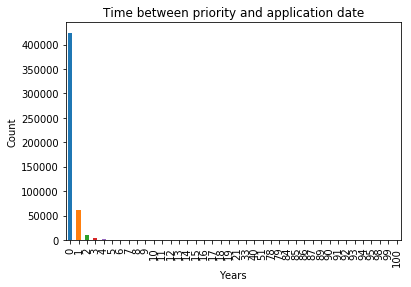

In [18]:
ax = (master.app_year-master.priority_date).value_counts().sort_index().plot(kind='bar', title='Time between priority and application date')
ax.set_ylabel('Count')
ax.set_xlabel('Years')

Text(0.5,1,'Time between priority and application date')

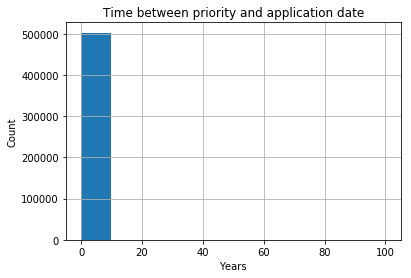

In [28]:
ax = (master.app_year-master.priority_date).hist(bins=10)
ax.set_ylabel('Count')
ax.set_xlabel('Years')
ax.set_title('Time between priority and application date')

Text(0.5,0,'Priority Year')

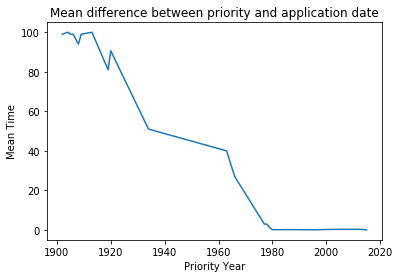

In [29]:
master['layover'] = master.app_year - master.priority_date
ax = master.groupby('priority_date')['layover'].mean().plot(title='Mean difference between priority and application date')
ax.set_ylabel('Mean Time')
ax.set_xlabel('Priority Year')

Same thing, but elimiate pre-1980

In [35]:
post_1980 = master.loc[master.priority_date >=1980]

(0, 1)

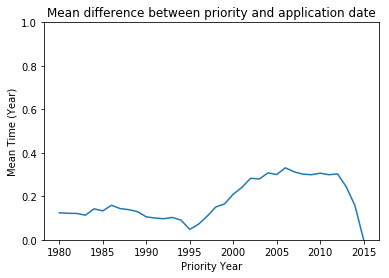

In [36]:
ax = post_1980.groupby('priority_date')['layover'].mean().plot(title='Mean difference between priority and application date')
ax.set_ylabel('Mean Time (Year)')
ax.set_xlabel('Priority Year')
ax.set_ylim([0,1])

Let's do this again, but separate by foreign and domestic

In [43]:
post_1980['foreign_priority'] = 0

/home/tiera/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
post_1980.loc[post_1980.patent_number.isin(foreign.patent_id)]

patent_number  grant_year  app_year  num_inventors  us_inventor  \
163          D261317        1981      1980              3          0.0   
164          D261318        1981      1980              3          0.0   
165          D261319        1981      1980              3          0.0   
189          D261441        1981      1980              3          0.0   
259          D261929        1981      1980              1          0.0   
470          D262733        1982      1980              1          0.0   
516          D263003        1982      1980              1          0.0   
692          D263587        1982      1980              1          0.0   
776          D263833        1982      1980              1          0.0   
777          D263834        1982      1980              2          0.0   
1015         D264414        1982      1980              1          0.0   
1084         D264586        1982      1980              1          0.0   
1089         D264600        1982      1980              2          0.0   
1210         D264821        1982      1980              1          0.0   
1223         D264854        1982      1980              1          0.0   
1245         D264897        1982      1980              1          0.0   
1295         D264978        1982      1980              1          0.0   
1353         D265063        1982      1980              1          0.0   
1452         D265212        1982      1980              1          0.0   
1527         D265312        1982      1980              2          0.0   
1528         D265313        1982      1980              2          0.0   
1533         D265326        1982      1980              1          0.0   
1639         D265465        1982      1980              1          0.0   
1640         D265466        1982      1980              1          0.0   
1641         D265467        1982      1980              1          0.0   
1649         D265477        1982      1980              1          0.0   
1650         D265481        1982      1980              1          0.0   
1663         D265497        1982      1980              2          0.0   
1677         D265514        1982      1980              3          0.0   
1708         D265556        1982      1980              1          0.0   
...              ...         ...       ...            ...          ...   
524950       D803376        2017      2015              2          0.0   
524956       D803389        2017      2015              3          0.0   
524970       D803448        2017      2015              1          0.0   
524991       D803546        2017      2015              2          0.0   
525026       D803742        2017      2015              2          0.0   
525054       D803896        2017      2015              3          0.0   
525063       D803940        2017      2015              1          0.0   
525092       D804054        2017      2015              3          0.0   
525097       D804109        2017      2015              1          0.0   
525112       D804176        2017      2015              1          0.0   
525160       D804436        2017      2015              3          0.0   
525168       D804451        2017      2015              1          0.0   
525171       D804472        2017      2015              4          0.0   
525175       D804485        2017      2015              2          0.0   
525181       D804513        2017      2015              2          0.0   
525190       D804561        2017      2015              2          0.0   
525199       D804610        2017      2015              3          1.0   
525236       D804817        2017      2015              3          0.0   
525248       D804902        2017      2015              1          0.0   
525256       D804953        2017      2015              1          0.0   
525258       D804979        2017      2015              1          0.0   
525259       D804980        2017      2015              1          0.0   
525268     